# House Price Prediction

This notebooks looks into the implementation of a end-to-end Data Science framework in an attempt to predict the sale price of a house based on its attributes.

The approach is as follows:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
We want to predict the sale price of a house based on its attributes, such as number of rooms, number of bathrooms, total area, etc.

## 2. Data 
The data we will be using is from the [Ames Housing Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) compiled by Dean De Cock.
The dataset has this content:
* **train.csv:** Training set.
* **test.csv:** Testing set.
* **data_description.txt:** Description of features.
* **sample_submissions.csv:** Example format for prediction submission.

## 3. Evaluation
According to Kaggle the metric that will be considered during submission is the Root-Mean-Squared-Log-Error (RMSLE). 
In order for us to claim that the project was successful, our submission needs to be in the top 200 in the [Leaderboard](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/leaderboard), that is, a RMSLE of 0.12010 or lower.



## 4. Features



### Understanding the data:
By exploring the `sample_submissions.csv` file we can know better the data we are dealing with:


* **MSSubClass:** Identifies the type of dwelling involved in the sale.

        * 20	1-STORY 1946 & NEWER ALL STYLES
        * 30	1-STORY 1945 & OLDER
        * 40	1-STORY W/FINISHED ATTIC ALL AGES
        * 45	1-1/2 STORY - UNFINISHED ALL AGES
        * 50	1-1/2 STORY FINISHED ALL AGES
        * 60	2-STORY 1946 & NEWER
        * 70	2-STORY 1945 & OLDER
        * 75	2-1/2 STORY ALL AGES
        * 80	SPLIT OR MULTI-LEVEL
        * 85	SPLIT FOYER
        * 90	DUPLEX - ALL STYLES AND AGES
        * 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        * 150	1-1/2 STORY PUD - ALL AGES
        * 160	2-STORY PUD - 1946 & NEWER
        * 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
        * 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

        Although this feature is set to a numerical type (`int64`). One can see that it is actually categorical.

* **MSZoning:** Identifies the general zoning classification of the sale.
		
       * A	Agriculture
       * C	Commercial
       * FV	Floating Village Residential
       * I	Industrial
       * RH	Residential High Density
       * RL	Residential Low Density
       * RP	Residential Low Density Park 
       * RM	Residential Medium Density

* **LotFrontage:** Linear feet of street connected to property.       
* **LotArea:** Lot size in square feet.

* **Street:** Type of road access to property.

       * Grvl	Gravel	
       * Pave	Paved

* **Alley:** Type of alley access to property.

       * Grvl	Gravel
       * Pave	Paved
       * NA 	No alley access
		
* **LotShape:** General shape of property.

       * Reg	Regular	
       * IR1	Slightly irregular
       * IR2	Moderately Irregular
       * IR3	Irregular
       
* **LandContour:** Flatness of the property.

       * Lvl	Near Flat/Level	
       * Bnk	Banked - Quick and significant rise from street grade to building
       * HLS	Hillside - Significant slope from side to side
       * Low	Depression
		
* **Utilities:** Type of utilities available.
		
       * AllPub	All public Utilities (E,G,W,& S)	
       * NoSewr	Electricity, Gas, and Water (Septic Tank)
       * NoSeWa	Electricity and Gas Only
       * ELO	       Electricity only

* **LotConfig:** Lot configuration.

       * Inside	Inside lot
       * Corner	Corner lot
       * CulDSac	Cul-de-sac
       * FR2	       Frontage on 2 sides of property
       * FR3	       Frontage on 3 sides of property
	
* **LandSlope:** Slope of property.
		
       * Gtl	Gentle slope
       * Mod	Moderate Slope	
       * Sev	Severe Slope

* **Neighborhood:** Physical locations within Ames city limits.

       * Blmngtn	Bloomington Heights
       * Blueste	Bluestem
       * BrDale	Briardale
       * BrkSide	Brookside
       * ClearCr	Clear Creek
       * CollgCr	College Creek
       * Crawfor	Crawford
       * Edwards	Edwards
       * Gilbert	Gilbert
       * IDOTRR	Iowa DOT and Rail Road
       * MeadowV	Meadow Village
       * Mitchel	Mitchell
       * Names	North Ames
       * NoRidge	Northridge
       * NPkVill	Northpark Villa
       * NridgHt	Northridge Heights
       * NWAmes	Northwest Ames
       * OldTown	Old Town
       * SWISU	South & West of Iowa State University
       * Sawyer	Sawyer
       * SawyerW	Sawyer West
       * Somerst	Somerset
       * StoneBr	Stone Brook
       * Timber	Timberland
       * Veenker	Veenker
			
* **Condition1:** Proximity to various conditions.
	
       * Artery	Adjacent to arterial street
       * Feedr	Adjacent to feeder street	
       * Norm	       Normal	
       * RRNn	       Within 200' of North-South Railroad
       * RRAn	       Adjacent to North-South Railroad
       * PosN	       Near positive off-site feature--park, greenbelt, etc.
       * PosA	       Adjacent to postive off-site feature
       * RRNe	       Within 200' of East-West Railroad
       * RRAe	       Adjacent to East-West Railroad
	
* **Condition2:** Proximity to various conditions (if more than one is present).
		
       * Artery	Adjacent to arterial street
       * Feedr	Adjacent to feeder street	
       * Norm 	Normal	
       * RRNn	       Within 200' of North-South Railroad
       * RRAn	       Adjacent to North-South Railroad
       * PosN 	Near positive off-site feature--park, greenbelt, etc.
       * PosA 	Adjacent to postive off-site feature
       * RRNe 	Within 200' of East-West Railroad
       * RRAe 	Adjacent to East-West Railroad
	
* **BldgType:** Type of dwelling.
		
       * 1Fam 	Single-family Detached	
       * 2FmCon	Two-family Conversion; originally built as one-family dwelling
       * Duplx	Duplex
       * TwnhsE	Townhouse End Unit
       * TwnhsI	Townhouse Inside Unit
	
* **HouseStyle:** Style of dwelling.
	
       * 1Story	One story
       * 1.5Fin	One and one-half story: 2nd level finished
       * 1.5Unf	One and one-half story: 2nd level unfinished
       * 2Story	Two story
       * 2.5Fin	Two and one-half story: 2nd level finished
       * 2.5Unf	Two and one-half story: 2nd level unfinished
       * SFoyer	Split Foyer
       * SLvl	Split Level
	
* **OverallQual:** Rates the overall material and finish of the house.

       * 10	Very Excellent
       * 9	Excellent
       * 8	Very Good
       * 7	Good
       * 6	Above Average
       * 5	Average
       * 4	Below Average
       * 3	Fair
       * 2	Poor
       * 1	Very Poor
	
* **OverallCond:** Rates the overall condition of the house.

       * 10	Very Excellent
       * 9	Excellent
       * 8	Very Good
       * 7	Good
       * 6	Above Average	
       * 5	Average
       * 4	Below Average	
       * 3	Fair
       * 2	Poor
       * 1	Very Poor
		
* **YearBuilt:** Original construction date.

* **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions).

* **RoofStyle:** Type of roof.

       * Flat	       Flat
       * Gable	Gable
       * Gambrel	Gabrel (Barn)
       * Hip	       Hip
       * Mansard	Mansard
       * Shed	       Shed
		
* **RoofMatl:** Roof material.

       * ClyTile	Clay or Tile
       * CompShg	Standard (Composite) Shingle
       * Membran	Membrane
       * Metal	Metal
       * Roll	Roll
       * Tar&Grv	Gravel & Tar
       * WdShake	Wood Shakes
       * WdShngl	Wood Shingles
		
* **Exterior1st:** Exterior covering on house.

       * AsbShng	Asbestos Shingles
       * AsphShn	Asphalt Shingles
       * BrkComm	Brick Common
       * BrkFace	Brick Face
       * CBlock	Cinder Block
       * CemntBd	Cement Board
       * HdBoard	Hard Board
       * ImStucc	Imitation Stucco
       * MetalSd	Metal Siding
       * Other	Other
       * Plywood	Plywood
       * PreCast	PreCast	
       * Stone	Stone
       * Stucco	Stucco
       * VinylSd	Vinyl Siding
       * Wd Sdng	Wood Siding
       * WdShing	Wood Shingles
	
* **Exterior2nd:** Exterior covering on house (if more than one material).

       * AsbShng	Asbestos Shingles
       * AsphShn	Asphalt Shingles
       * BrkComm	Brick Common
       * BrkFace	Brick Face
       * CBlock	Cinder Block
       * CemntBd	Cement Board
       * HdBoard	Hard Board
       * ImStucc	Imitation Stucco
       * MetalSd	Metal Siding
       * Other	Other
       * Plywood	Plywood
       * PreCast	PreCast
       * Stone	Stone
       * Stucco	Stucco
       * VinylSd	Vinyl Siding
       * Wd Sdng	Wood Siding
       * WdShing	Wood Shingles
	
* **MasVnrType:** Masonry veneer type.

       * BrkCmn	Brick Common
       * BrkFace	Brick Face
       * CBlock	Cinder Block
       * None 	None
       * Stone	Stone
	
* **MasVnrArea:** Masonry veneer area in square feet.

* **ExterQual:** Evaluates the quality of the material on the exterior.
		
       * Ex	Excellent
       * Gd	Good
       * TA	Average/Typical
       * Fa	Fair
       * Po	Poor
		
* **ExterCond:** Evaluates the present condition of the material on the exterior.
		
       * Ex	Excellent
       * Gd	Good
       * TA	Average/Typical
       * Fa	Fair
       * Po	Poor
		
* **Foundation:** Type of foundation.
		
       * BrkTil	Brick & Tile
       * CBlock	Cinder Block
       * PConc	Poured Contrete	
       * Slab	Slab
       * Stone	Stone
       * Wood	Wood
		
* **BsmtQual:** Evaluates the height of the basement.

       * Ex	Excellent (100+ inches)	
       * Gd	Good (90-99 inches)
       * TA	Typical (80-89 inches)
       * Fa	Fair (70-79 inches)
       * Po	Poor (<70 inches
       * NA	No Basement
		
* **BsmtCond:** Evaluates the general condition of the basement.

       * Ex	Excellent
       * Gd	Good
       * TA	Typical - slight dampness allowed
       * Fa	Fair - dampness or some cracking or settling
       * Po	Poor - Severe cracking, settling, or wetness
       * NA	No Basement
	
* **BsmtExposure:** Refers to walkout or garden level walls.

       * Gd	Good Exposure
       * Av	Average Exposure (split levels or foyers typically score average or above)	
       * Mn	Mimimum Exposure
       * No	No Exposure
       * NA	No Basement
	
* **BsmtFinType1:** Rating of basement finished area.

       * GLQ	Good Living Quarters
       * ALQ	Average Living Quarters
       * BLQ	Below Average Living Quarters	
       * Rec	Average Rec Room
       * LwQ	Low Quality
       * Unf	Unfinshed
       * NA	No Basement
		
* **BsmtFinSF1:** Type 1 finished square feet.

* **BsmtFinType2:** Rating of basement finished area (if multiple types).

       * GLQ	Good Living Quarters
       * ALQ	Average Living Quarters
       * BLQ	Below Average Living Quarters	
       * Rec	Average Rec Room
       * LwQ	Low Quality
       * Unf	Unfinshed
       * NA	No Basement

* **BsmtFinSF2:** Type 2 finished square feet.

* **BsmtUnfSF:** Unfinished square feet of basement area.

* **TotalBsmtSF:** Total square feet of basement area.

* **Heating:** Type of heating.
		
       * Floor	Floor Furnace
       * GasA	Gas forced warm air furnace
       * GasW	Gas hot water or steam heat
       * Grav	Gravity furnace	
       * OthW	Hot water or steam heat other than gas
       * Wall	Wall furnace
		
* **HeatingQC:** Heating quality and condition.

       * Ex	Excellent
       * Gd	Good
       * TA	Average/Typical
       * Fa	Fair
       * Po	Poor
		
* **CentralAir:** Central air conditioning.

       * N	No
       * Y	Yes
		
* **Electrical:** Electrical system.

       * SBrkr	Standard Circuit Breakers & Romex
       * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       * Mix  	Mixed
		
* **1stFlrSF:** First Floor square feet.
 
* **2ndFlrSF:** Second floor square feet.

* **LowQualFinSF:** Low quality finished square feet (all floors).

* **GrLivArea:** Above grade (ground) living area square feet.

* **BsmtFullBath:** Basement full bathrooms.

* **BsmtHalfBath:** Basement half bathrooms.

* **FullBath:** Full bathrooms above grade.

* **HalfBath:** Half baths above grade.

* **Bedroom:** Bedrooms above grade (does NOT include basement bedrooms).

* **Kitchen:** Kitchens above grade.

* **KitchenQual:** Kitchen quality.

       * Ex	Excellent
       * Gd	Good
       * TA	Typical/Average
       * Fa	Fair
       * Po	Poor
       	
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms).

* **Functional:** Home functionality (Assume typical unless deductions are warranted).

       * Typ  	Typical Functionality
       * Min1 	Minor Deductions 1
       * Min2 	Minor Deductions 2
       * Mod  	Moderate Deductions
       * Maj1 	Major Deductions 1
       * Maj2        Major Deductions 2
       * Sev	       Severely Damaged
       * Sal  	Salvage only
		
* **Fireplaces:** Number of fireplaces.

* **FireplaceQu:** Fireplace quality.

       * Ex	Excellent - Exceptional Masonry Fireplace
       * Gd	Good - Masonry Fireplace in main level
       * TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       * Fa	Fair - Prefabricated Fireplace in basement
       * Po	Poor - Ben Franklin Stove
       * NA	No Fireplace
		
* **GarageType:** Garage location.
		
       * 2Types	More than one type of garage
       * Attchd	Attached to home
       * Basment	Basement Garage
       * BuiltIn	Built-In (Garage part of house - typically has room above garage)
       * CarPort	Car Port
       * Detchd	Detached from home
       * NA	       No Garage
		
* **GarageYrBlt:** Year garage was built.
		
* **GarageFinish:** Interior finish of the garage.

       * Fin	Finished
       * RFn	Rough Finished	
       * Unf	Unfinished
       * NA	No Garage
		
* **GarageCars:** Size of garage in car capacity.

* **GarageArea:** Size of garage in square feet.

* **GarageQual:** Garage quality.

       * Ex	Excellent
       * Gd	Good
       * TA	Typical/Average
       * Fa	Fair
       * Po	Poor
       * NA	No Garage
		
* **GarageCond:** Garage condition.

       * Ex	Excellent
       * Gd	Good
       * TA	Typical/Average
       * Fa	Fair
       * Po	Poor
       * NA	No Garage
		
* **PavedDrive:** Paved driveway.

       * Y	Paved 
       * P	Partial Pavement
       * N	Dirt/Gravel

* **WoodDeckSF:** Wood deck area in square feet.

* **OpenPorchSF:** Open porch area in square feet.

* **EnclosedPorch:** Enclosed porch area in square feet.

* **3SsnPorch:** Three season porch area in square feet.

* **ScreenPorch:** Screen porch area in square feet.

* **PoolArea:** Pool area in square feet.

* **PoolQC:** Pool quality
		
       * Ex	Excellent
       * Gd	Good
       * TA	Average/Typical
       * Fa	Fair
       * NA	No Pool
		
* **Fence:** Fence quality.
		
       * GdPrv	Good Privacy
       * MnPrv	Minimum Privacy
       * GdWo	Good Wood
       * MnWw	Minimum Wood/Wire
       * NA	No Fence
	
* **MiscFeature:** Miscellaneous feature not covered in other categories.
		
       * Elev 	Elevator
       * Gar2 	2nd Garage (if not described in garage section)
       * Othr 	Other
       * Shed 	Shed (over 100 SF)
       * TenC 	Tennis Court
       * NA   	None
		
* **MiscVal:** $Value of miscellaneous feature.

* **MoSold:** Month Sold (MM)

* **YrSold:** Year Sold (YYYY)

* **SaleType:** Type of sale.
		
       * WD  	       Warranty Deed - Conventional
       * CWD  	Warranty Deed - Cash
       * VWD  	Warranty Deed - VA Loan
       * New  	Home just constructed and sold
       * COD  	Court Officer Deed/Estate
       * Con  	Contract 15% Down payment regular terms
       * ConLw	Contract Low Down payment and low interest
       * ConLI	Contract Low Interest
       * ConLD	Contract Low Down
       * Oth  	Other
		
* **SaleCondition:** Condition of sale.

       * Normal	Normal Sale
       * Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       * AdjLand	Adjoining Land Purchase
       * Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       * Family	Sale between family members
       * Partial	Home was not completed when last assessed (associated with New Homes)

### Data wrangling and analysis workflow

To cleanse our data and to analyze it before training a model, we will do as follows:

1. Remove missing values
2. Transform data into numbers
3. Perform exploratory data analysis (EDA)

### Importing out tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's import the training set and check some data

In [2]:
data_org = pd.read_csv("data/train.csv")
data = data_org.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(f"We have {len(data)} samples in our data set")

We have 1460 samples in our data set


### Filling missing values

Let's check if there are missing values (aka `NaN`) in our dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are definitely some columns with missing values. Checking the `data_description.txt` file, one can see that for each column the missing values actually correspond to another well defined category. 

Now let's see how many missing values we have in the dataset.

In [5]:
# Calculate missing values for each column
df_miss = pd.DataFrame(data.isna().sum(), columns=["missing"])
# Calculate the percentage of values that are missing for each column
df_miss["percentage [%]"] = df_miss["missing"]/len(data)*100
# Log the data type dor each column
df_miss["data_type"] = data.dtypes
# Sort columns from highest missing values to lowest
df_miss.sort_values(by="missing", ascending=False, inplace=True)
# Show only the columns with missing values greater than zero
df_miss[df_miss["missing"] > 0]

,missing,percentage [%],data_type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


Notice how some of the columns above are related to each other. For example `GarageType`, `GarageQual` and `GarageYrBlt`, a value of NaN in `GarageType` indicates that the house does not have a garage, whereas `GarageYrBlt` indicates the year the Garage was built. So if there is a sample with no garage, we will have to impute the median to `GarageYrBlt` in order for us to keep the sample.

For all the categorical columns with missing values we will replace the `NaN` values with `"None"`.

In [6]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

for col in data.columns:
    # Check if it has any missing values
    if data[col].isna().any():
        # Check if it is a categorical feature
        if is_string_dtype(data[col]):
            # Replace NaNs with None
            data[col].fillna("None", inplace=True)

In [7]:
data["PoolQC"].isna().sum()

0

Now for the numerical features with missing values we will replace the `NaN` values with the median of the column:

In [8]:
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(data["GarageYrBlt"].median())
data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].median())


Now let's check if we got rid of all the missing values.

In [9]:
data.isna().sum().sum()

0

Yeap, no more missing values.

To summarize this, we create a function:

In [10]:
def fill_missing_values(data):
    """
    Fills missing values for the house price prediction dataset
    """
    data_tmp = data.copy()
    # Remove missing values for categorical features
    for col in data_tmp.columns:
        # Check if it has any missing values
        if data_tmp[col].isna().any():
            # Check if it is a categorical feature
            if is_string_dtype(data_tmp[col]):
                # Replace NaNs with None
                data_tmp[col].fillna("None", inplace=True)
            if is_numeric_dtype(data_tmp[col]):
                # Replace NaNs with None
                data_tmp[col].fillna(data_tmp[col].median(), inplace=True)

    return data_tmp

Let's check if it works:

In [11]:
data_no_nan = fill_missing_values(data_org)
data_no_nan.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Turning data into numbers

In order for us to obtain a model that is able to predict the sale price of a house, we need to turn the data
we have into something the model can understand: numbers.

By exploring the `data_description.txt` file we are able to identify two main types of data:

* **Numerical data:** Continuous numeric values representing a quantity (quantitative). For example, the columns `PoolArea` or `LotArea`.
* **Categorical data:** Values that lie in a predefined set of categories (qualitative). This type of data have, to a certain extent, two properties:
    * **Ordinality:** Indicates at what extent the categories are related in a decreasing or increasing way. We could see it as: `how strong sorting the values would make sense`. 
    
        For instance, let's say we have a `temperature` column with the possible values: `cold`, `warm` and `hot`. This column will have a high ordinality because their values are set in a decreasing or increasing manner, and we could sort the values from low temperature to high (`cold`, `warm`, `hot`) or from high to low (`hot`, `warm`, `cold`). 
    
        Let's check another example; let it be the column `car_brand` with the possible values: `BMW`, `Ford`, `Audi` and `Nissan`. Would it make sense to sort these values in a particular way? Well, it depends on the problem you want to solve. If some how, you want to catch a relation between how expensive these brands are and the problem you want to solve maybe there is some ordinality in this data, and you could sort them as `BMW`,`Audi`, `Ford` and `Nissan`; but if you consider that how expensive these brands are will not be important for your analysis, then these data will have little to no ordinality. 
    
        So at the end, the ordinality of a feature depends on the context you will use it for.

    * **Cardinality:** Indicates the number of categories for the data. Take for instance, the `temperature` column which has the possible values: `cold`, `warm` and `hot`. This column would have a cardinality of 3, which is its number of possible values.

Now that we know that the numerical data is already numeric, how do we turn the categorical data into a numeric form? Well, this process is called categorical encoding, and there are several ways to approach it. We will focus on two ways of categorical encoding:
* **Label Encoding:** Assigns a numeric value for each of the categories in a column. 

    Let's go back to the `temperature` example, which has the categories `cold`, `warm` and `hot`. If we were to apply label encoding to this column we would obtain this new set of possible values: `0`, `1` and `2`. Where `cold = 0`, `warm = 1` and `hot = 2`. 

    Because the data is ordinal it is **really important** to make sure that the numeric values reflect the ordinality of the categories. For instance, let's say you have the `quality` column with the categories `Excellent`, `Good`, `Average`, `Poor` and `Awful`, the ordinality is clear in this example; now you apply label encoding to `quality` and you obtain the next mapping: `Excellent = 3`, `Good = 1`, `Average = 0`, `Poor = 4` and `Awful = 2`. Do you see what is wrong? The ordinality is not present in the numeric representation of `quality`. A correct label encoding mapping would be: `Excellent = 4`, `Good = 3`, `Average = 2`, `Poor = 1` and `Awful = 0` or `Excellent = 0`, `Good = 1`, `Average = 2`, `Poor = 3` and `Awful = 4`.

    | Category  | Value |
    |-----------|-------|
    | Excellent |   5   |
    |   Good    |   4   |
    |  Average  |   3   |
    |   Poor    |   2   |
    |   Awful   |   1   |
    

    It is advised to apply label encoding for features/columns for which you identify **ordinality and high cardinality**. 

* **One-Hot Encoding:** Turns all the categories of a particular feature into columns.

    Let's go back to the `car_brand` example, which has the categories `BMW`, `Ford`, `Audi` and `Nissan`. If we apply one-hot encoding to this feature we would end up with four boolean columns: `car_brand_BMW`, `car_brand_Ford`, `car_brand_Audi` and `car_brand_Nissan`, each of these columns would only have two values: 0 or 1. 
    
    Let's say that before applying one-hot encodding we have a sample with the value of `Audi` in the `car_brand` column; after applying one-hot encoding we would have four columns, and for that particular sample, the values for those columns would be `car_brand_BMW=0`, `car_brand_Ford=0`, `car_brand_Audi=1` and `car_brand_Nissan=0`. The value `1` is only assigned to the column that is attached to the category of the sample, for all the other columns the value is `0`.

    | car_brand | car_brand_BMW | car_brand_Ford | car_brand_Audi | car_brand_Nissan |
    |-----------|---------------|----------------|----------------|------------------|
    |    Audi   |       0       | 0              | 1              | 0                |

    It is advised to apply one-hot encoding for features/columns for which you identify **little to no ordinality and low cardinality**. 

Let's separate the numeric and the categorical columns of our dataset:

In [12]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

categorical_columns = []
numerical_columns = []

for col in data.columns:
    if is_string_dtype(data[col]): categorical_columns.append(col)
    elif is_numeric_dtype(data[col]): numerical_columns.append(col)

# Sanity check to check that al columns have been selected
print(len(categorical_columns + numerical_columns))

81


Now we have to do the following for the each of the categorical features:

1. Identify if it is ordinal or not

2. If it is ordinal we will apply label encoding
    * Manually generate the labels mapping so the ordinality is preserved.

3. If it is non-ordinal we will apply one-hot encoding

By reading the `data_description.txt` we figured out with features are ordinal and which not (although these results are open to discussion). 

||ORDINAL| |
|--|--|--|
|Street| Utilities | LandSlope |
|ExterQual| ExterCond | BsmtQual |
|BsmtCond| BsmtExposure | BsmtFinType1 |
|BsmtFinType2| HeatingQC | CentralAir |
|KitchenQual| Functional | FireplaceQu |
|GarageFinish| GarageQual | GarageCond |
|PavedDrive| GarageCond | Fence |


|| NON-ORDINAL | |
|--|--|--|
|MSZoning| Alley | LotShape |
|LandContour| LotConfig | Neighborhood |
|Condition1| Condition2 | BldgType |
|HouseStyle| RoofStyle | RoofMatl |
|Exterior1st| Exterior2nd | MasVnrType |
|Foundation| Heating | Electrical |
|GarageType| MiscFeature | SaleType |
|SaleCondition|  |  |

In [13]:
ordinal_cols = ["Street","Utilities","LandSlope","ExterQual","ExterCond",
                "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                "HeatingQC","CentralAir","KitchenQual","Functional","FireplaceQu",
                "GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence"]
                
non_ordinal_cols = [colname for colname in categorical_columns if (colname not in ordinal_cols)]

Now we create the mapping for each ordinal feature. Remember that we do this manually to make sure ordinality is preserved during the encoding process

In [14]:
street_enc = {"Grvl": 0, "Pave": 1}
utilities_enc = {"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0} 
landslope_enc = {"Gtl": 0, "Mod": 1, "Sev": 2}
exterqual_enc = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}
extercond_enc = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}
bsmtqual_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
bsmtcond_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
bsmtexpo_enc = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}
bsmtfin1_enc = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0}
bsmtfin2_enc = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0}
heatingcq_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
centralair_enc = {"N": 0, "Y": 1}
kitchenqual_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
functional_enc = {"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0}
fireplace_qu_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
garagefinish_enc = {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0}
garagequal_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
garagecond_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
paveddrive_enc = {"Y": 2, "P": 1, "N": 0}
poolqc_end = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
fence_enc = {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1,"None": 0}

ordinal_encoding_dict = {"Street": street_enc, "Utilities": utilities_enc, 
                        "LandSlope": landslope_enc,"ExterQual": exterqual_enc,
                        "ExterCond": extercond_enc, "BsmtQual": bsmtqual_enc,
                        "BsmtCond": bsmtcond_enc,"BsmtExposure":bsmtexpo_enc,
                        "BsmtFinType1":bsmtfin1_enc,"BsmtFinType2":bsmtfin2_enc, 
                        "HeatingQC":heatingcq_enc,"CentralAir":centralair_enc,
                        "KitchenQual":kitchenqual_enc,"Functional":functional_enc,
                        "FireplaceQu":fireplace_qu_enc,"GarageFinish":garagefinish_enc,
                        "GarageQual":garagequal_enc,"GarageCond":garagecond_enc,
                        "PavedDrive":paveddrive_enc,"PoolQC":poolqc_end, "Fence":fence_enc}

Let's apply the label encoding to the ordinal categorical columns.

In [15]:
data = data.replace(ordinal_encoding_dict)

Let's check one of the encoded columns to see if it worked:

In [16]:
data["KitchenQual"].value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

Now we proceed to apply one-hot encoding for the non-ordinal categorical features

In [17]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,None,Reg,Lvl,3,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,None,Reg,Lvl,3,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,None,IR1,Lvl,3,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,None,IR1,Lvl,3,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,None,IR1,Lvl,3,...,0,0,0,None,0,12,2008,WD,Normal,250000


In [18]:
data_oh = data.copy()
data_oh = pd.get_dummies(data_oh[non_ordinal_cols])
data_oh.T.head()

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning_C (all),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MSZoning_FV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
MSZoning_RH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MSZoning_RL,1,1,1,1,1,1,1,1,0,1,...,1,1,0,1,0,1,1,1,1,1
MSZoning_RM,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


We remove the non-ordinal columns to only leave their one-hot representation.

In [19]:
data_2 = data.copy()
data_2.drop(non_ordinal_cols, axis=1, inplace=True)
data_3 = pd.concat((data_2,data_oh), axis=1)
data_3.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,3,0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,3,0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,3,0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


Now we summarize the encoding process with the next function:

In [20]:
def encode(data_no_nan):
    """
    Encodes categorical data through label (ordinal features) and one-hot (non-ordinal features) encoding
    """
    # Select categorical features
    categorical_columns = []
    
    for col in data.columns:
        if is_string_dtype(data[col]): categorical_columns.append(col)

    # Select ordinal and non-ordinal features
    ordinal_cols = ["Street","Utilities","LandSlope","ExterQual","ExterCond",
                "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                "HeatingQC","CentralAir","KitchenQual","Functional","FireplaceQu",
                "GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence"]
                
    non_ordinal_cols = [colname for colname in categorical_columns if (colname not in ordinal_cols)]

    data_tmp = data_no_nan.copy()

    # Create mapping for the label encoding (ordinal features)
    street_enc = {"Grvl": 0, "Pave": 1, "None": -1}
    utilities_enc = {"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0, "None": -1} 
    landslope_enc = {"Gtl": 0, "Mod": 1, "Sev": 2, "None": -1}
    exterqual_enc = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0, "None": -1}
    extercond_enc = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0, "None": -1}
    bsmtqual_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    bsmtcond_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    bsmtexpo_enc = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}
    bsmtfin1_enc = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0}
    bsmtfin2_enc = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0}
    heatingcq_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    centralair_enc = {"N": 0, "Y": 1, "None": -1}
    kitchenqual_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    functional_enc = {"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0, "None": -1}
    fireplace_qu_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    garagefinish_enc = {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0}
    garagequal_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    garagecond_enc = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    paveddrive_enc = {"Y": 2, "P": 1, "N": 0, "None": -1}
    poolqc_end = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
    fence_enc = {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1,"None": 0}

    ordinal_encoding_dict = {"Street": street_enc, "Utilities": utilities_enc, 
                            "LandSlope": landslope_enc,"ExterQual": exterqual_enc,
                            "ExterCond": extercond_enc, "BsmtQual": bsmtqual_enc,
                            "BsmtCond": bsmtcond_enc,"BsmtExposure":bsmtexpo_enc,
                            "BsmtFinType1":bsmtfin1_enc,"BsmtFinType2":bsmtfin2_enc, 
                            "HeatingQC":heatingcq_enc,"CentralAir":centralair_enc,
                            "KitchenQual":kitchenqual_enc,"Functional":functional_enc,
                            "FireplaceQu":fireplace_qu_enc,"GarageFinish":garagefinish_enc,
                            "GarageQual":garagequal_enc,"GarageCond":garagecond_enc,
                            "PavedDrive":paveddrive_enc,"PoolQC":poolqc_end, "Fence":fence_enc}
    # Apply label encoding
    data_tmp =  data_tmp.replace(ordinal_encoding_dict)

    # Create a DataFrame with only the one-hot encoding for the non-ordinal features
    data_oh = pd.get_dummies(data_tmp[non_ordinal_cols])
    
    # Create a DataFrame with only the features that did not go through the one-hot encoding
    data_2 = data_tmp.drop(non_ordinal_cols, axis=1)
    
    # Merge the 2 DataFrames
    data_full = pd.concat((data_2,data_oh), axis=1)
       
    return  data_full

Let's apply the categorical encoding to the data with no missing values.

In [21]:
data_enc = encode(data_no_nan)
data_enc.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,3,0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,3,0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,3,0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


In [22]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 229 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(56), uint8(170)
memory usage: 915.5 KB


Notice how all the columns data type are numeric.

### The catch of encoding

There is a catch when we encode the data the way we just did. Let us explain what is the catch by working through the test set.

Recall that there are two datasets:

* Training set: The data set we will use to train and evaluate the models. Will be splitted into training set (to train the models) and validation set (to evaluate the models), and is the one we have worked with so far.

* Test set: The data that we will use to make the predictions that will be submitted to Kaggle.

We already encoded the training set, i.e. turned the data into numbers; we have to do the same thing for the test set. Let's import the test set:


In [23]:
data_test_org = pd.read_csv("data/test.csv")
data_test_org.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Let's check if the test set has any missing values

In [24]:
data_test_org.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

We fill the missing values using the function that we created previously

In [25]:
data_test_no_nan = fill_missing_values(data_test_org)
data_test_no_nan.isna().sum().sum()

0

Now that there are no missing values in the test set, we proceed to turn the categorical data into numbers with the encoding function we created previously.

In [26]:
data_test_enc = encode(data_test_no_nan)
data_test_enc.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,1,3,0,5,6,1961,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,1,3,0,6,6,1958,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,1,3,0,5,5,1997,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,1,3,0,6,6,1998,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,1,3,0,8,5,1992,...,0,0,0,1,0,0,0,0,1,0


Now, here comes the catch. Let's have a look to our training set:

In [27]:
data_enc.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,3,0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,3,0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,3,0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


Notice how the number of columns in the training set and the number of columns in the test set are different (ignore the `SalePrice` column). If we train a model with the training set and then we try to use it to make predictions on the test set, we would get an error. In order for us to make predictions on the test set, the number of columns in the test set need to be equal to the number of columns in the training set (ignore the `SalePrice` column). 

But, why is the number of columns in the test set different from the number of columns in the training data set?
The answer is in the one-hot encoding.

When we apply `pd.get_dummies()` we get the one-hot encoding of the non-ordinal features. Recall the `car_brand` example, let us have a training set with only one feature, the `car_brand` feature, we identify that in the training set the `car_brand` column has the unique values `BMW`, `Ford`, `Audi` and `Nissan`; after applying one-hot encoding to the `car_brand` column we obtain the columns `car_brand_BMW`, `car_brand_Audi`, `car_brand_Ford` and `car_brand_Nissan`, 4 columns in total. 

| car_brand_BMW | car_brand_Ford | car_brand_Audi | car_brand_Nissan |
|---------------|----------------|----------------|------------------|
    

Now we have the test set with only one feature, the `car_brand` feature, and we identify that in the test set the `car_brand` column has the unique values `BMW` and `Audi` (no samples with `car_brand`=`Ford` nor `car_brand`=`Nissan`). After applying one-hot encoding to the `car_brand` feature we would obtain the columns `car_brand_BMW` and `car_brand_Audi`, 2 columns in total.

| car_brand_BMW | car_brand_Audi |
|---------------|----------------|

So, after applying one-hot encoding for the training and test sets, we end up with 4 and 2 columns, respectively. This difference in the number of columns in the training and test sets will not allow us to make predictions on the test set with a model trained with the training set. To solve this issue we can add the columns from the training set to the test set. Particularly for the example that we have been discussing, we will need to add the columns `car_brand_Ford` and `car_brand_Nissan` to the one-encoded test set, this columns will be filled with zeroes. It is really important to preserve the order of the columns as it is in the training set, that is, we need to add the `car_brand_Ford` column after `car_brand_BMW` and before `car_brand_Audi`, and we would also need to add `car_brand_Nissan` after `car_brand_Audi`. 

Now that the training and test sets have the same number of columns, we will be able to make predictions on the test set with a model trained on the training set.

But there is something more we need to be aware of. Going back to our `car_brand` example let's say that we have the same training set, it has only the `car_brand` feature for which we identify the unique values `BMW`, `Ford`, `Audi` and `Nissan`. But now we identify that, in the test set, the `car_brand` feature has the unique values `BMW`, `Audi`, `Toyota` and `None`. Although the training and the test set would have the same number of columns after applying one-hot encoding, it would make no sense to make predictions on the test set with a model trained on the training set, because the columns of both data sets do not have the same meaning. It would be like comparing apples to peanuts. It is wrong!!!

To overcome this issue, we would need add the columns `car_brand_Toyota` and  `car_brand_None` to the training set, and `car_brand_Ford` and `car_brand_Nissan` to the test set. So at the end both datasets would have the columns:

| car_brand_BMW | car_brand_Ford | car_brand_Audi | car_brand_Nissan | car_brand_Toyota | car_brand_None |
|---------------|----------------|----------------|------------------|------------------|----------------|

This way we should we able to make predictions on the test set with a model trained on a training set with no problem.

Now, if the test set is supposed to be accessible after and only after the modelling phase of the project, how are we supposed to know the values that are in the test set but not in the training set?
If we have something like the `data_description.txt` file for the data, where we can find all the possible values for the features (non-ordinal). It comes down to add some dummy samples to the training set with all the possible values for a particular non-ordinal column, then we apply one-hot encoding, we would end up with one-hot columns for all the possible values for all the non-ordinal features. We could do the same when trying encode the test set.


Let's apply all this concepts to our training and test sets. We will follow the next workflow:
1. Import training and test set
2. Fill missing values for training and test set
3. Add one sample to the training set with a value of `None` for the non-ordinal columns.
4. Encode the training set.
5. Encode the test set.
6. Compare the columns of the training and test set. The columns that are in the training set, but that are not in the test set are added to the latter.
7. Check that the number of columns is the same for both the training and the test set, and that the order of the columns matches.


1. Import training and test set

In [28]:
data_train = data_org.copy()
data_test = data_test_org.copy()

2. Fill missing values for training and test set

In [29]:
data_train = fill_missing_values(data_train)
data_test = fill_missing_values(data_test)

3. Add one sample to the training set with a value of `None` for the non-ordinal columns

In [30]:
sample_0 = {}
for col in data_train.columns:
    if is_string_dtype(data_train[col]): 
        sample_0[col] = "None"
    elif is_numeric_dtype(data_train[col]): 
        sample_0[col] = 0
data_train.loc[len(data_train)] = sample_0
data_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,Normal,147500
1460,0,0,None,0.0,0,None,None,None,None,None,...,0,None,None,None,0,0,0,None,None,0


4. Encode the training dataset

In [31]:
data_train = encode(data_train)
data_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_None,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,0,7,5,2003,...,0,0,1,0,0,0,0,0,1,0
1,2,20,80.0,9600,1,3,0,6,8,1976,...,0,0,1,0,0,0,0,0,1,0
2,3,60,68.0,11250,1,3,0,7,5,2001,...,0,0,1,0,0,0,0,0,1,0
3,4,70,60.0,9550,1,3,0,7,5,1915,...,0,0,1,1,0,0,0,0,0,0
4,5,60,84.0,14260,1,3,0,8,5,2000,...,0,0,1,0,0,0,0,0,1,0


5. Encode the test set

In [32]:
data_test = encode(data_test)
data_test.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,1,3,0,5,6,1961,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,1,3,0,6,6,1958,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,1,3,0,5,5,1997,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,1,3,0,6,6,1998,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,1,3,0,8,5,1992,...,0,0,0,1,0,0,0,0,1,0


6. Compare the columns of the training and test sets.

In [33]:
train_cols = data_train.columns
test_cols = data_test.columns


print("Before adding the columns to the test set: ", len(train_cols), len(test_cols))

for col in train_cols:
    # Check if the column is not in the test set
    if col not in test_cols:
        # Get the index of the column in the training set
        col_loc = data_train.columns.get_loc(col)
        # Insert the new column in the right position and assigning a value of 0
        data_test.insert(col_loc, col, 0)

train_cols = data_train.columns
test_cols = data_test.columns

print("After adding the columns to the test set: ", len(train_cols), len(test_cols))

Before adding the columns to the test set:  246 216
After adding the columns to the test set:  246 246


7. Check that the number of columns is the same for both the training and the test set, and that the order of the columns matches.

In [34]:
len(data_train.columns), len(data_test.columns)

(246, 246)

In [35]:
np.sum(data_train.columns == data_test.columns)

246

### Exploratory Data Analysis (EDA)


We will use the data with no missing values for the analysis.

In [36]:
data_train_no_nan = fill_missing_values(data_org)
data_train_no_nan.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


#### Categorical features

Let's check some bar plots for the categorical features.

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

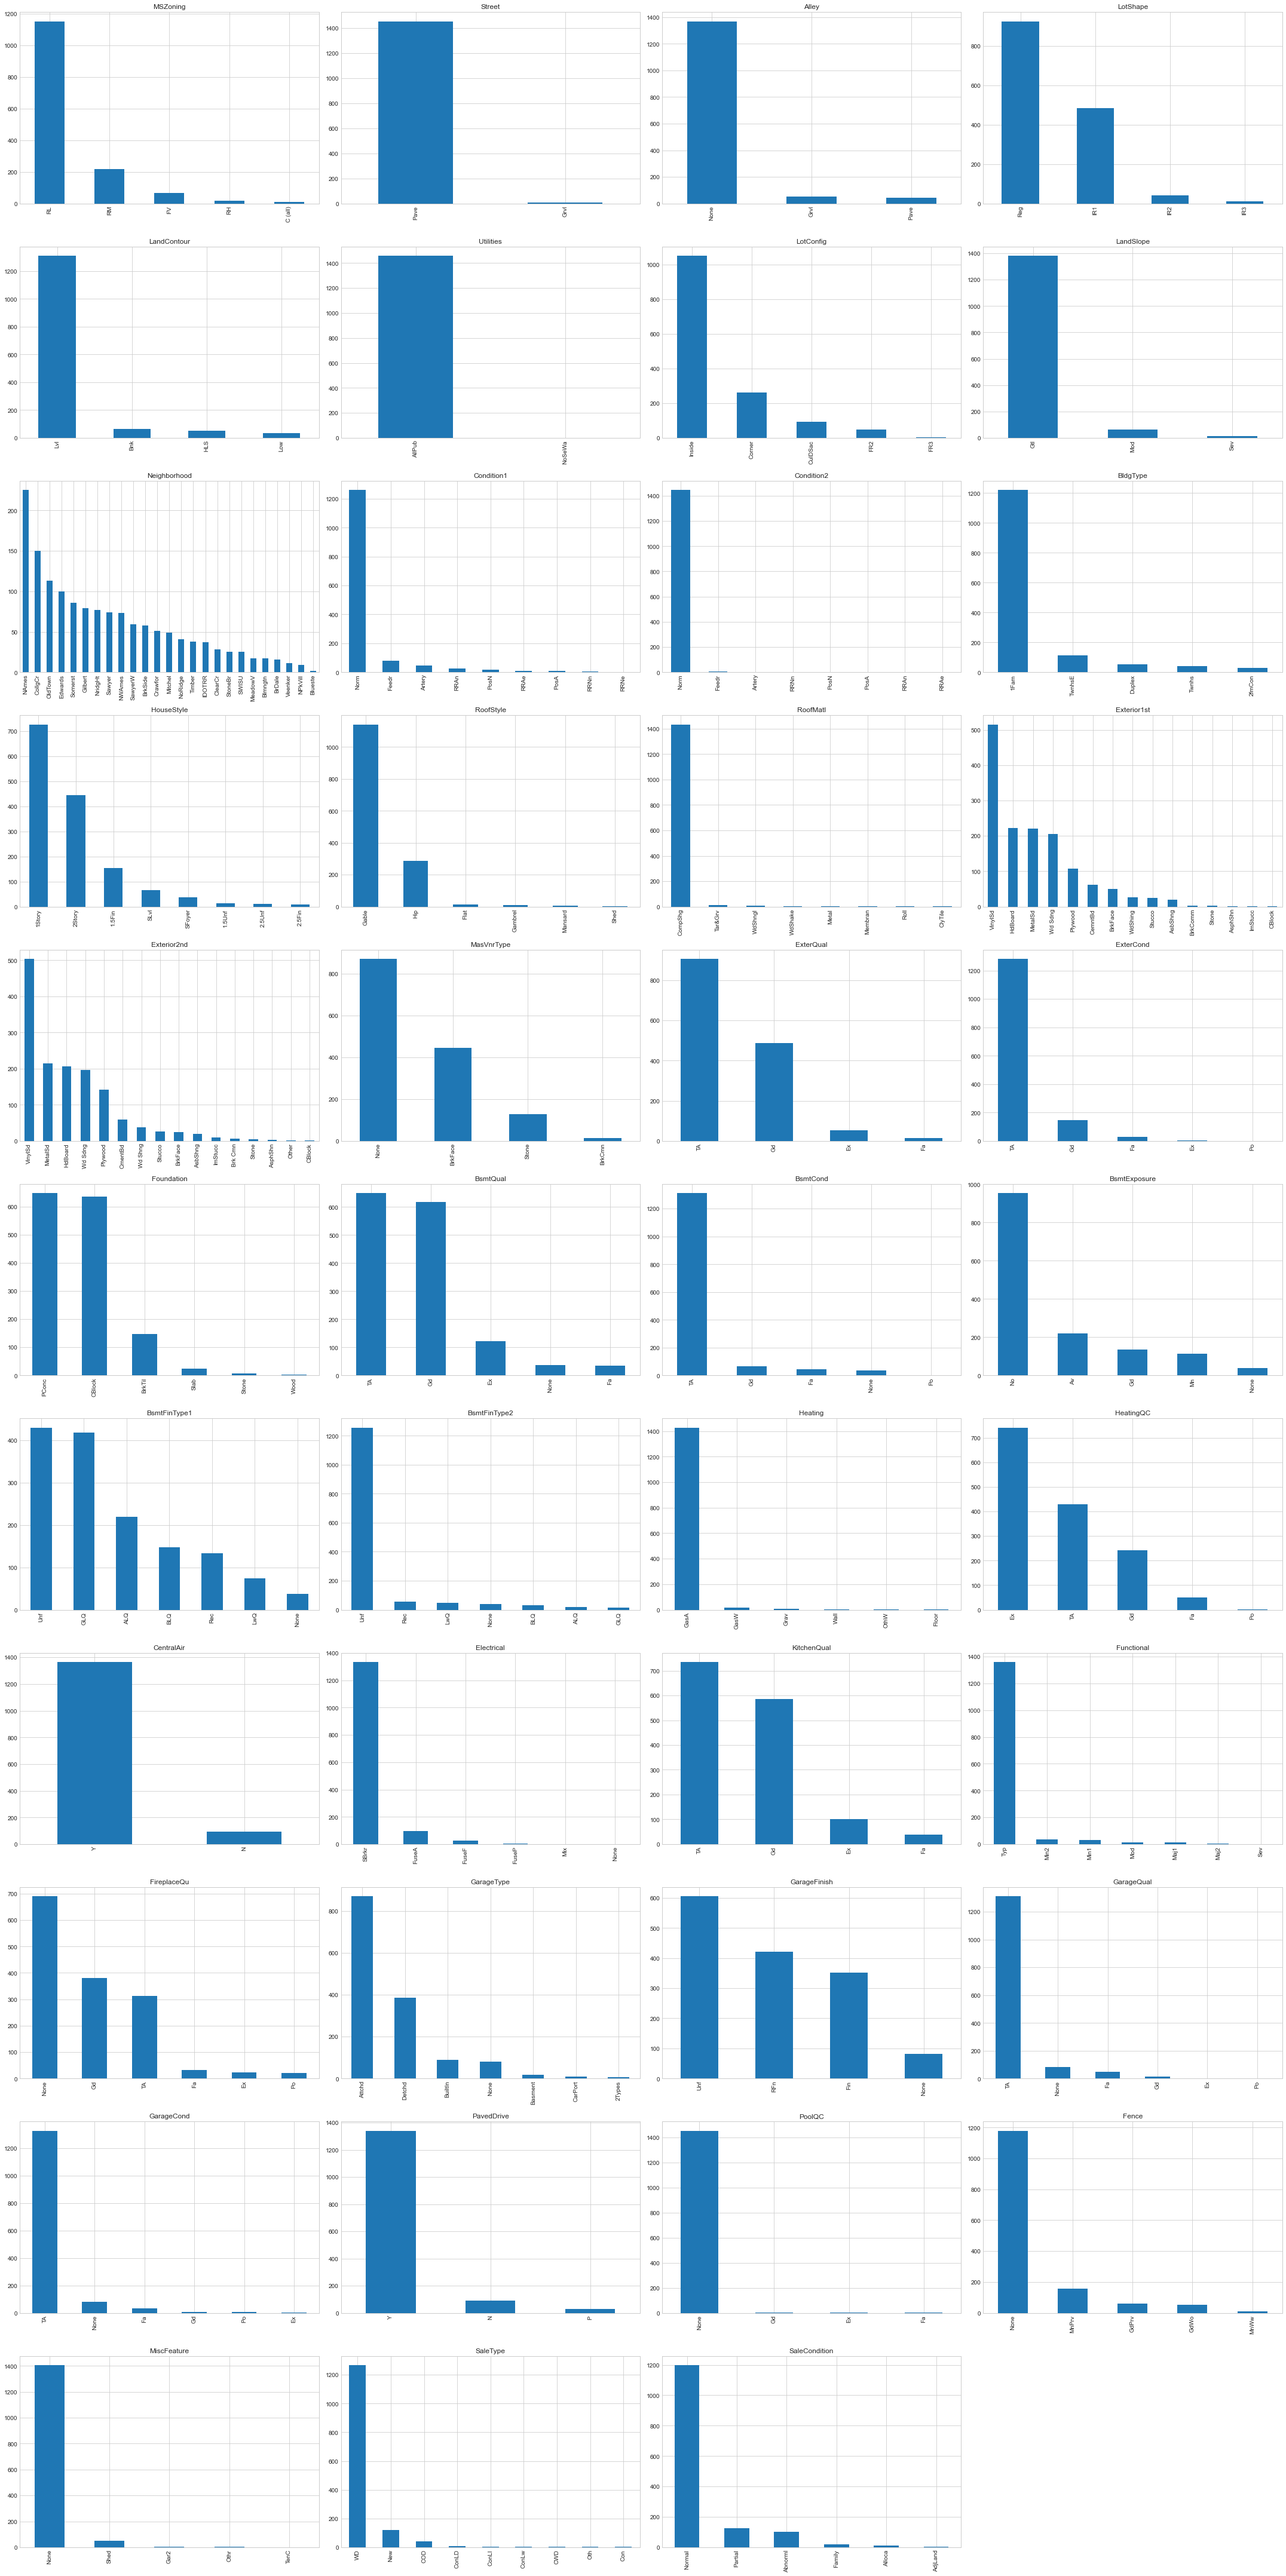

In [38]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(30,60))   
for i, feature in enumerate(categorical_columns):
    sub = fig.add_subplot(11, 4, i + 1)
    data_train_no_nan[feature].value_counts().plot(kind="bar")
    sub.set_title(feature)

plt.tight_layout(h_pad=1.0)
plt.show()

Now let's check how the house sale price is distributed according to each category of the categorical features through a box-plot.

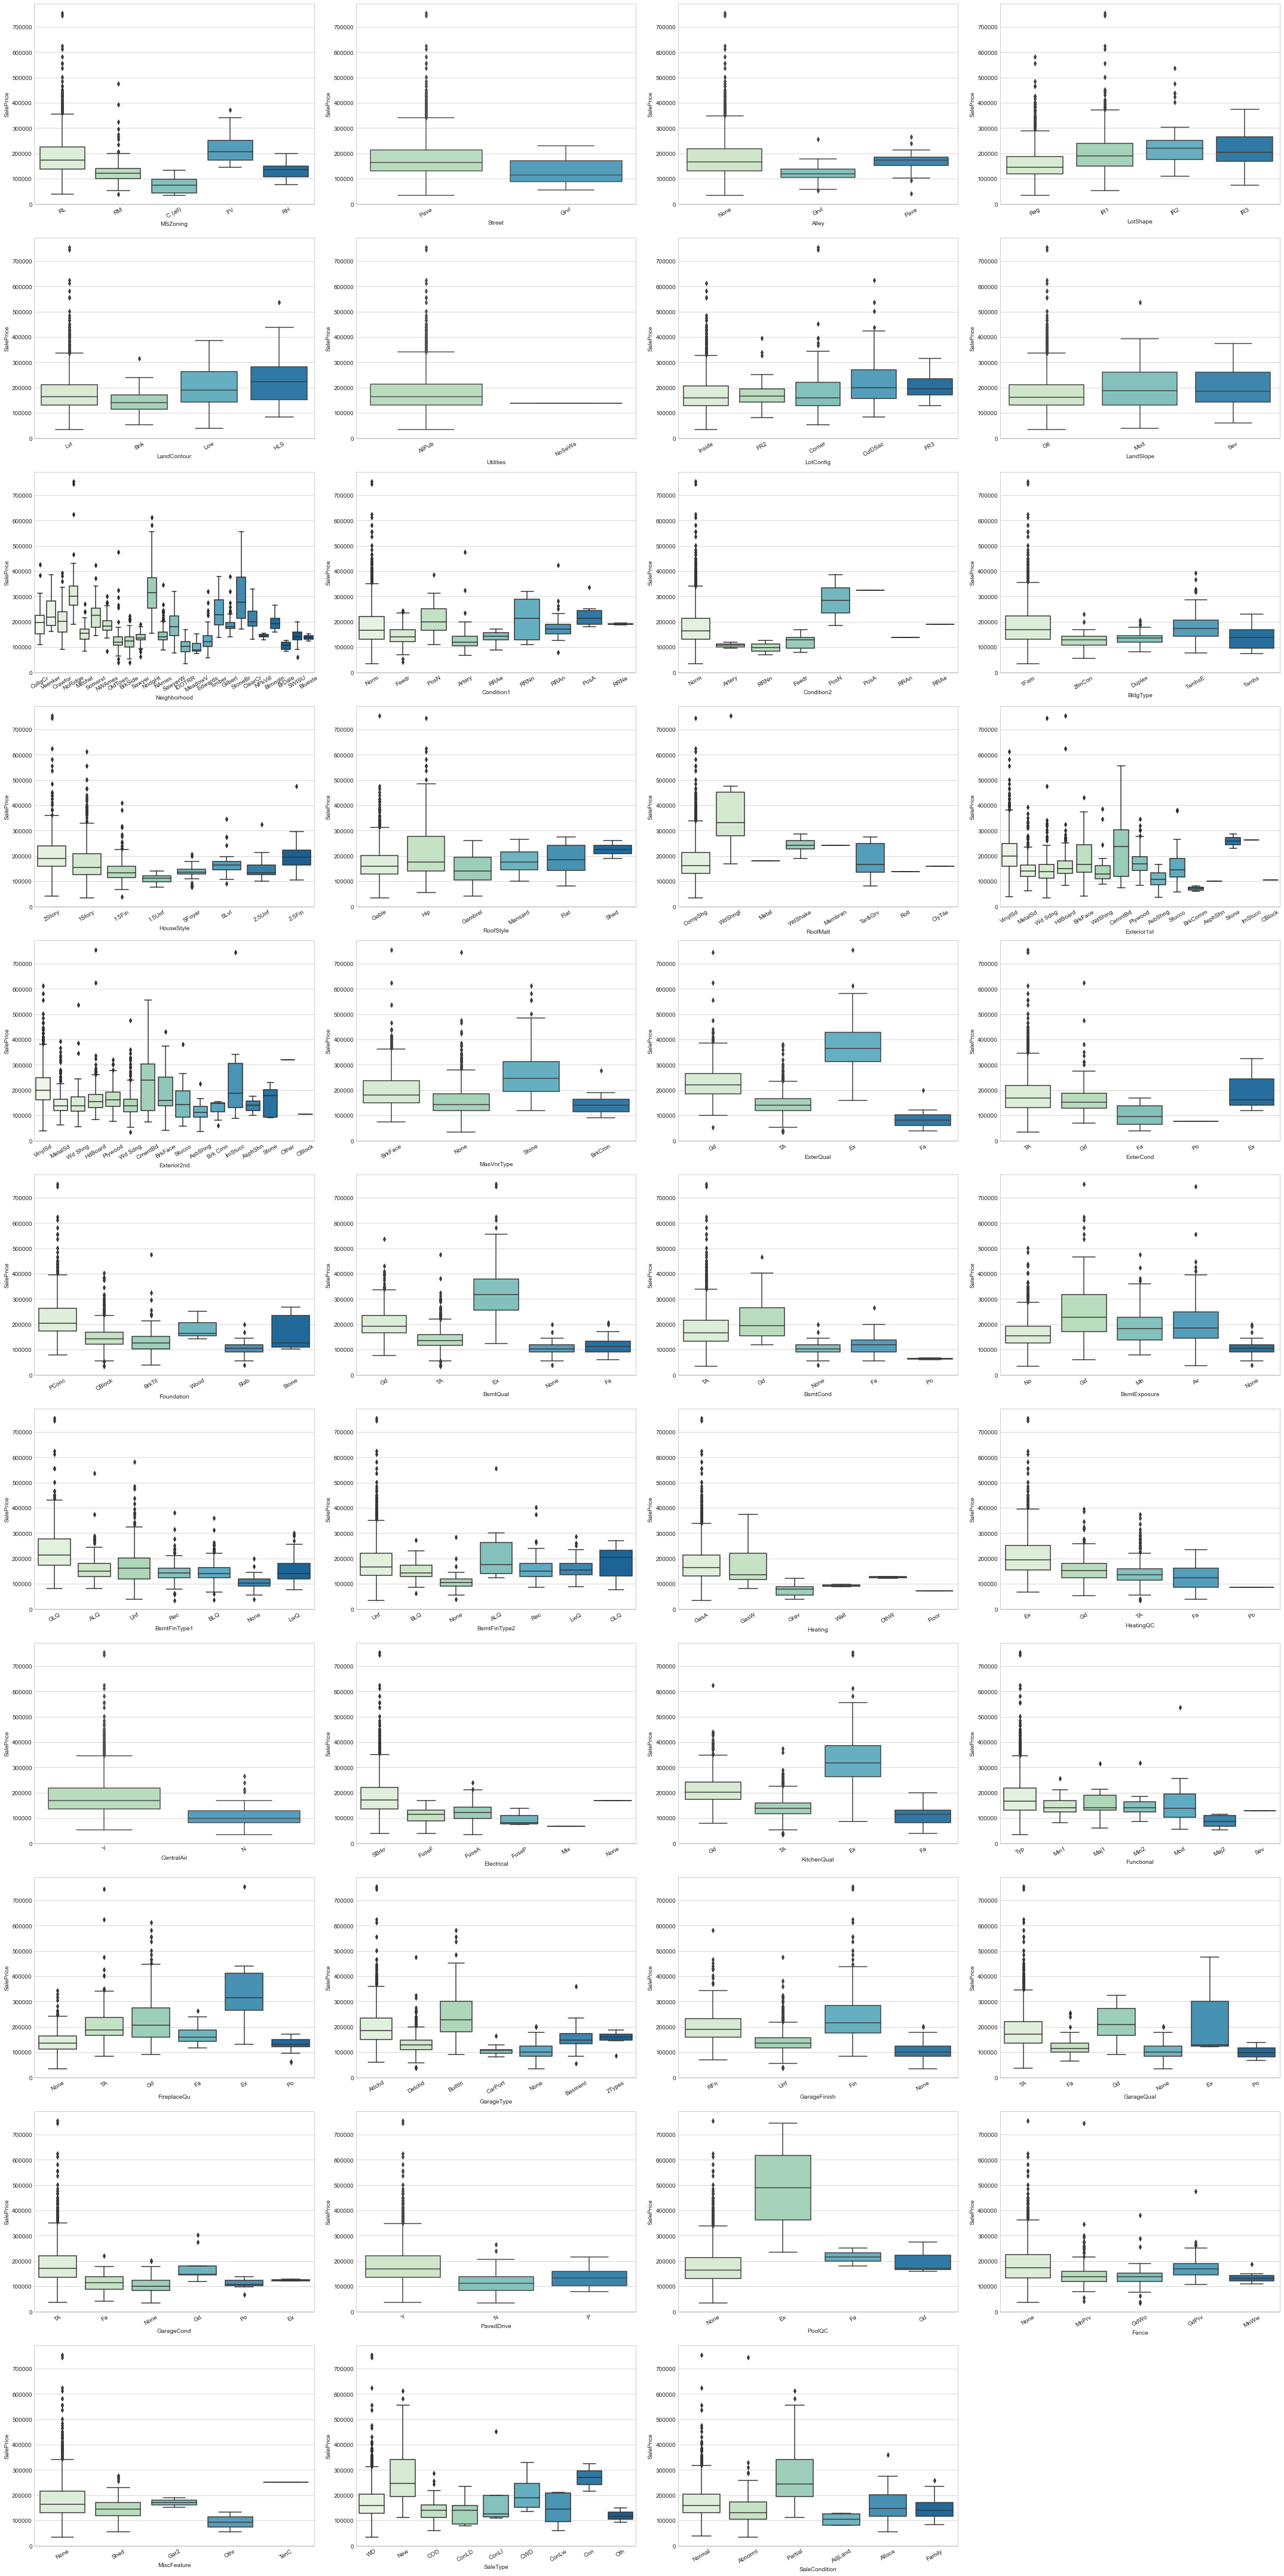

In [39]:
import seaborn as sns
fig = plt.figure(figsize=(30,60))   
for i, col in enumerate(categorical_columns):
    sub = fig.add_subplot(11, 4, i + 1)
    ax = sns.boxplot(x = data_train_no_nan[col],
                y = data_train_no_nan["SalePrice"], 
                palette = "GnBu")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.tight_layout(h_pad=1.0)
plt.show()

#### Numeric features

Let's check some histograms for the numeric features.

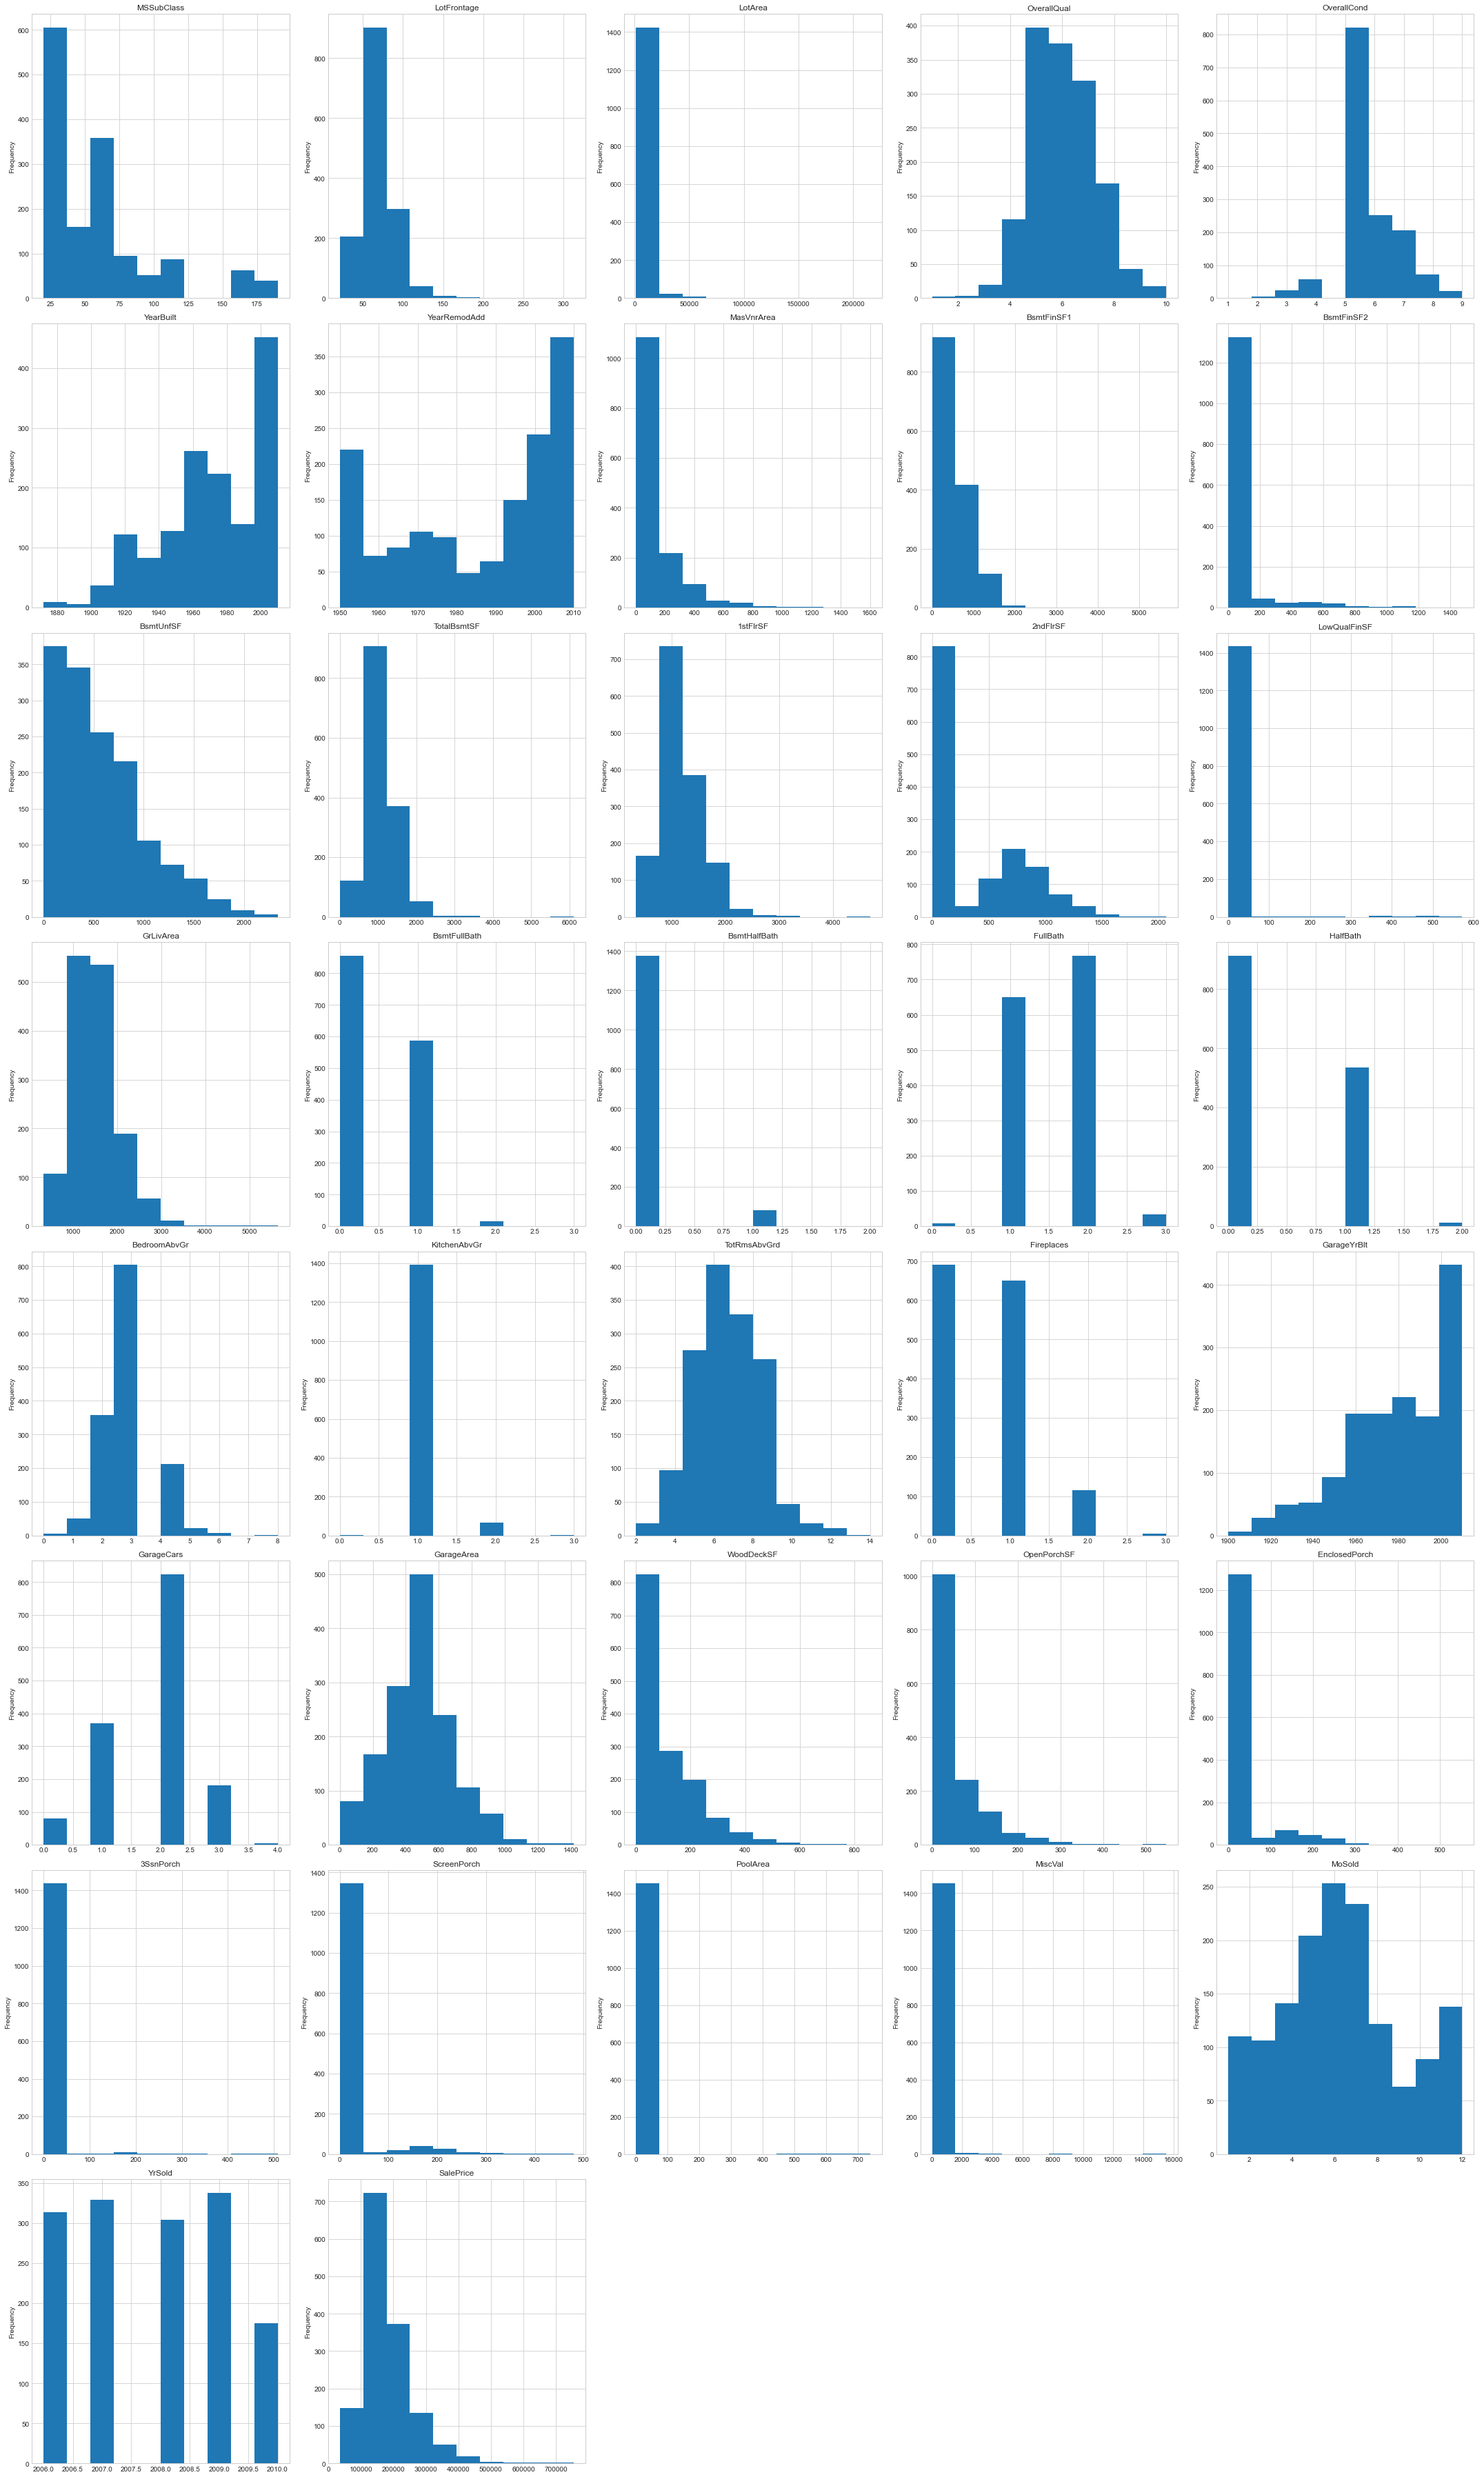

In [40]:
fig = plt.figure(figsize=(30,50))   
for i, feature in enumerate(numerical_columns[1:]):
    sub = fig.add_subplot(8, 5, i + 1)
    data_train_no_nan[feature].plot(kind="hist")
    sub.set_title(feature)

plt.tight_layout(h_pad=1.0)
plt.show()

It would be interesting to see the correlation between the numerical features.

<AxesSubplot:>

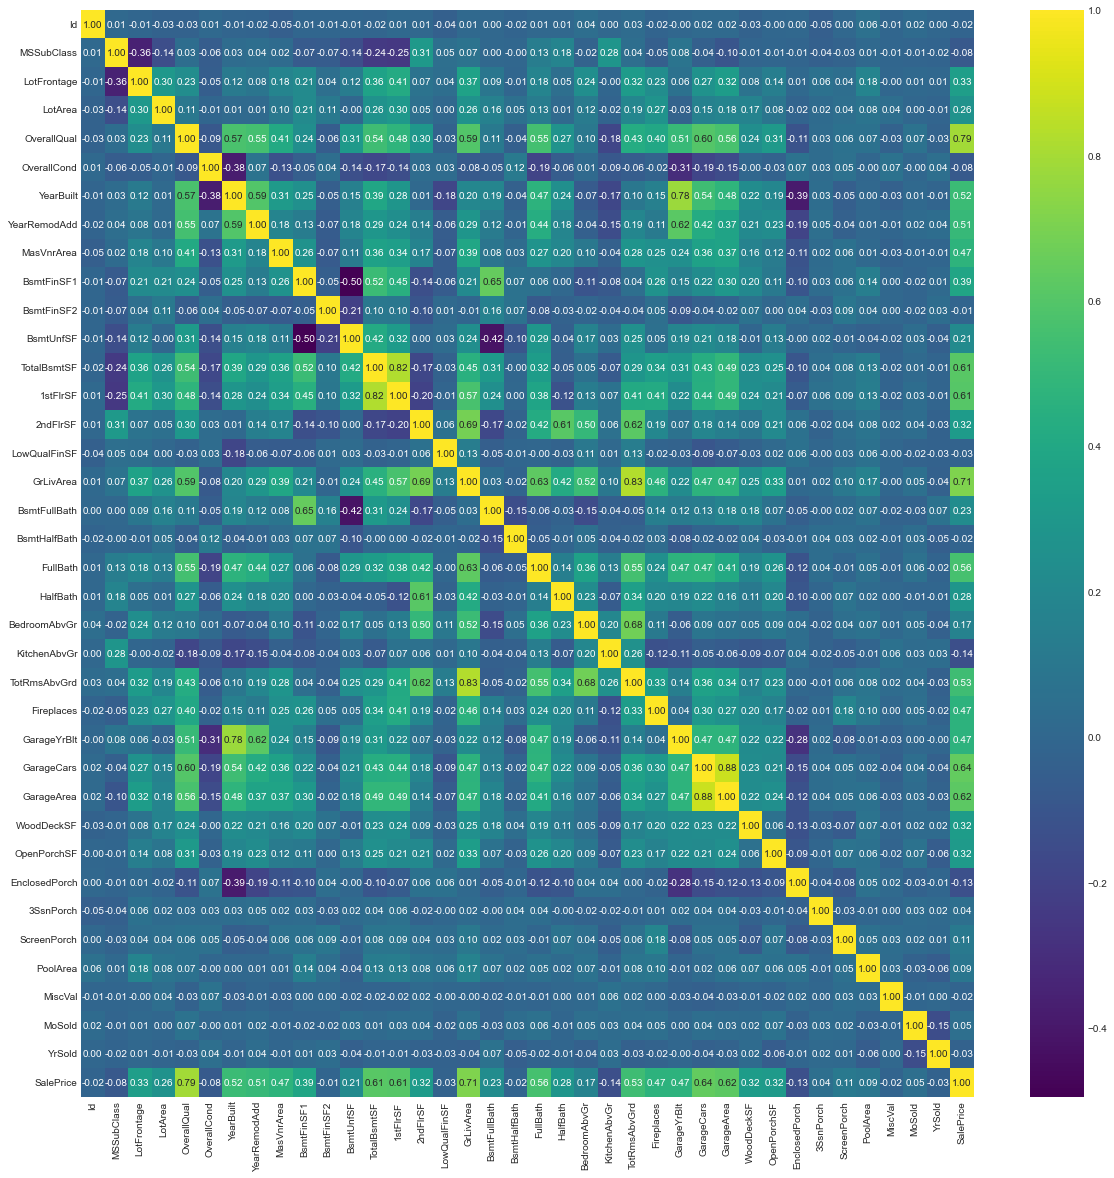

In [41]:
fig, ax = plt.subplots(figsize=(20,20))
correlation = data_train_no_nan[numerical_columns].corr()
sns.heatmap(correlation, cmap="viridis", annot=True, fmt=".2f")

## 5. Modelling

To obtain the best results we will do as follows:

1. Review options for scaling the data. 
2. Spliting training data into training and validation sets
3. Training vanilla models on training+validation set and evaluating through Cross-validation
4. Pick models with best performance
5. Hyperparameter tunning of best models with RandomizedSearchCV or GridSearchCV
6. Explore model stacking to get the best results

Now let's work on some regression models:

* Ridge (Linear regression penalizing L2-norm of weights)
* Lasso (Linear regression penalizing L1-norm of weights)
* ElasticNet (Linear regression penalizing both L1-norm and L2-norm of weights)
* SVR with RBF kernel
* Random Forest Regressor
* Gradient Boost Regressor
* Light Gradient Boost Regressor

Let's format the dataset in a way that can the models can handle. This time we are taking the data with no missing values and fully encoded.

In [42]:
X = data_train.drop("SalePrice", axis=1)
y = data_train["SalePrice"]

Import some libraries

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

c:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Now we define some evaluation metrics to measure the performace of our models.

In [44]:
def rmsle(y_test, y_preds):
    """
     Calculate Root Mean Squared Log Error between predictions and 
     true labels.
     """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))    

# Create function to evaluate model on a few different levels
def show_scores(model, X_train, X_val, y_train, y_val):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training RMSLE": rmsle(y_train, train_preds),
              "Validation RMSLE": rmsle(y_val, val_preds)}
    return scores

def rmsle_cv_score(model, X, y):
    score = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error")
    return np.mean(np.sqrt(score))

### 1. Review options for scaling the data. 

For models based on decision trees, like Random Forest Regressor or XGBoost Regressor, the scale of the data has no major impact.

We will use three approaches:

* Non-scaled data
* Standardized-scaled data
* Min-Max-scaled data

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Non-scaled data

In [46]:
X_non_scaled = X

Standardized-scaled data

In [47]:
std_scaler = StandardScaler().fit(X)
X_standardized = std_scaler.transform(X)

Min-Max-scaled data

In [48]:
minmax_scaler = MinMaxScaler().fit(X)
X_minmax = minmax_scaler.transform(X)

### 2. Spliting training data into training and validation sets

To evaluate our model we will split our data into training and validation sets. It is really important to clarify that the preprocessing of the data, (filling of the missing values and the encoding of the categorical features) uses the whole data set (training and validation set), when in reality **only the training set** should be used to preprocess the data that will be used to train the model. By using the validation set, we are incurring in something called **Data Leakeage**.

Now let's split the data.

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 245), (293, 245), (1168,), (293,))

### 3. Training vanilla models on training+validation set and evaluating through Cross-validation

It is time to train some models. Let's start with 



#### Ridge: Does not work because some outputs are negative.

In [50]:
model = Ridge()
model.fit(X_train, y_train)
show_scores(model, X_train, X_val, y_train, y_val)

In [ ]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=42))
ridge.fit(X, y)
show_scores(ridge, X_train, X_val, y_train, y_val)

In [ ]:
ridge = make_pipeline(RobustScaler(),Ridge(alpha =0.0005, random_state=42))
ridge_cv_score = rmsle_cv_score(ridge, X, y)
print(f"Mean RMSLE for Ridge: {ridge_cv_score:.2f}")

#### Lasso: Does not work because some outputs are negative.

In [ ]:
model = Lasso(alpha =0.0005, random_state=42, max_iter=10000)
model.fit(X_train, y_train)
show_scores(model, X_train, X_val, y_train, y_val)


c:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+11, tolerance: 6.998e+08
  model = cd_fast.enet_coordinate_descent(


{'Training RMSLE': 0.12307454184706142,
 'Validation RMSLE': 0.18158162592251595}

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=0, max_iter=10000))
lasso.fit(X, y)
show_scores(lasso, X_train, X_val, y_train, y_val)

c:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.719e+11, tolerance: 9.241e+08
  model = cd_fast.enet_coordinate_descent(


{'Training RMSLE': 0.12739439789024692,
 'Validation RMSLE': 0.12648148017256014}

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =5, random_state=0, max_iter=10000))
lasso_cv_score = rmsle_cv_score(lasso, X, y)
print(f"Mean RMSLE for Lasso: {lasso_cv_score:.2f}")

#### ElasticNet: Does not work because some outputs are negative.

In [ ]:
model = ElasticNet()
model.fit(X_train, y_train)
show_scores(model, X_train, X_val, y_train, y_val)

In [ ]:
elnet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0))
elnet.fit(X, y)
show_scores(elnet, X_train, X_val, y_train, y_val)

c:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.882e+11, tolerance: 9.241e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=0))])

In [ ]:
elnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio=.9, random_state=0))
elnet_cv_score = rmsle_cv_score(elnet, X, y)
print(f"Mean RMSLE for ElasticNet: {elnet_cv_score:.2f}")

#### Support Vector Regressor with Radial Basis Function Kernel

In [51]:
model = SVR(kernel="rbf")
model.fit(X_train, y_train)
scores_svr_ton_X_train = show_scores(model, X_train, X_val, y_train, y_val)

scores_svr_ton_X_train

{'Training RMSLE': 0.5255518019079811, 'Validation RMSLE': 0.4315221025887662}

In [52]:
svr_rbf = make_pipeline(RobustScaler(), SVR(kernel="rbf"))
svr_rbf.fit(X, y)
scores_svr_ton_X = show_scores(svr_rbf, X_train, X_val, y_train, y_val)

scores_svr_ton_X

{'Training RMSLE': 0.5259157249769716, 'Validation RMSLE': 0.4313089173608979}

In [53]:
svr_rbf = make_pipeline(RobustScaler(), SVR(kernel="rbf"))
svr_rbf_cv_score = rmsle_cv_score(svr_rbf, X, y)
print(f"Mean RMSLE for SVR RBF: {svr_rbf_cv_score:.4f}")

Mean RMSLE for SVR RBF: 0.4820


#### Random Forest Regressor

In [54]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
scores_rfr_ton_X_train = show_scores(model, X_train, X_val, y_train, y_val)

scores_rfr_ton_X_train

{'Training RMSLE': 0.2948246492478768, 'Validation RMSLE': 0.15100516840940645}

In [55]:
rfr = make_pipeline(RobustScaler(), RandomForestRegressor())
rfr.fit(X, y)
scores_rfr_ton_X = show_scores(rfr, X_train, X_val, y_train, y_val)

scores_rfr_ton_X

{'Training RMSLE': 0.2961600516883784, 'Validation RMSLE': 0.06437434531268199}

In [56]:
rfr = RandomForestRegressor()
rfr_cv_score = rmsle_cv_score(rfr, X, y)
print(f"Mean RMSLE for Random Forest Regressor: {rfr_cv_score:.4f}")

Mean RMSLE for Random Forest Regressor: 0.2446


#### XGBoost Regressor

In [57]:
model = XGBRegressor()
model.fit(X_train, y_train)
show_scores(model, X_train, X_val, y_train, y_val)
scores_xgbr_ton_X_train = show_scores(model, X_train, X_val, y_train, y_val)

scores_xgbr_ton_X_train

{'Training RMSLE': 0.10107584001628886,
 'Validation RMSLE': 0.16117373595531392}

In [58]:
xgbr = XGBRegressor()
xgbr.fit(X, y)
scores_xgbr_ton_X = show_scores(xgbr, X_train, X_val, y_train, y_val)

scores_xgbr_ton_X

{'Training RMSLE': 0.15913397295725618,
 'Validation RMSLE': 0.013097998536577641}

In [59]:
xgbr = XGBRegressor()
xgbr_cv_score = rmsle_cv_score(xgbr, X, y)
print(f"Mean RMSLE for XGB Regressor: {xgbr_cv_score:.4f}")

Mean RMSLE for XGB Regressor: 0.2404


#### Light Gradient Boosting Regressor (LGBM)

In [60]:
model = LGBMRegressor()
model.fit(X_train, y_train)
scores_lgbr_ton_X_train = show_scores(model, X_train, X_val, y_train, y_val)

scores_lgbr_ton_X_train

{'Training RMSLE': 0.2966112651308051, 'Validation RMSLE': 0.1435149197959219}

In [61]:
lgbr = LGBMRegressor()
lgbr.fit(X, y)
scores_lgbr_ton_X = show_scores(lgbr, X_train, X_val, y_train, y_val)

scores_xgbr_ton_X

{'Training RMSLE': 0.15913397295725618,
 'Validation RMSLE': 0.013097998536577641}

In [62]:
lgbr = LGBMRegressor()
lgbr_cv_score = rmsle_cv_score(lgbr, X, y)
print(f"Mean RMSLE for LGB Regressor: {lgbr_cv_score:.4f}")

Mean RMSLE for LGB Regressor: 0.2340


#### First results

Let's visualize more clearly the results we obtained with the models that didn't throw any errors

In [63]:
svr_list = list(scores_svr_ton_X_train.values()) + list(scores_svr_ton_X.values()) + [svr_rbf_cv_score]
rbr_list = list(scores_rfr_ton_X_train.values()) + list(scores_rfr_ton_X.values()) + [rfr_cv_score]
xgbr_list = list(scores_xgbr_ton_X_train.values()) + list(scores_xgbr_ton_X.values()) + [xgbr_cv_score]
lgbr_list = list(scores_lgbr_ton_X_train.values()) + list(scores_lgbr_ton_X.values()) + [lgbr_cv_score]

res_dict = {"SVR_RBF": svr_list,
            "Random Forest Regressor": rbr_list,
            "XGboost Regressor": xgbr_list,
            "LGBM Regressor": lgbr_list}

In [74]:
first_results = pd.DataFrame(res_dict).transpose()
first_results.columns = ["Train RMSLE - TOT",
                         "Val. RMSLE - TOT",
                         "Train RMSLE - TOX",
                         "Val. RMSLE - TOX",
                         "Cross-V. RSMLE"]

first_results.insert(0, "models", ["SVR RBF", "Random Forest Regressor", "XGboost Regressor", "LGBM Regressor"])
first_results.head()

,models,Train RMSLE - TOT,Val. RMSLE - TOT,Train RMSLE - TOX,Val. RMSLE - TOX,Cross-V. RSMLE
SVR_RBF,SVR RBF,0.525552,0.431522,0.525916,0.431309,0.482035
Random Forest Regressor,Random Forest Regressor,0.294825,0.151005,0.296160,0.064374,0.244643
XGboost Regressor,XGboost Regressor,0.101076,0.161174,0.159134,0.013098,0.240428
LGBM Regressor,LGBM Regressor,0.296611,0.143515,0.291368,0.059397,0.234033


In [75]:
first_results.T

,SVR_RBF,Random Forest Regressor,XGboost Regressor,LGBM Regressor
models,SVR RBF,Random Forest Regressor,XGboost Regressor,LGBM Regressor
Train RMSLE - TOT,0.525552,0.294825,0.101076,0.296611
Val. RMSLE - TOT,0.431522,0.151005,0.161174,0.143515
Train RMSLE - TOX,0.525916,0.29616,0.159134,0.291368
Val. RMSLE - TOX,0.431309,0.064374,0.013098,0.059397
Cross-V. RSMLE,0.482035,0.244643,0.240428,0.234033


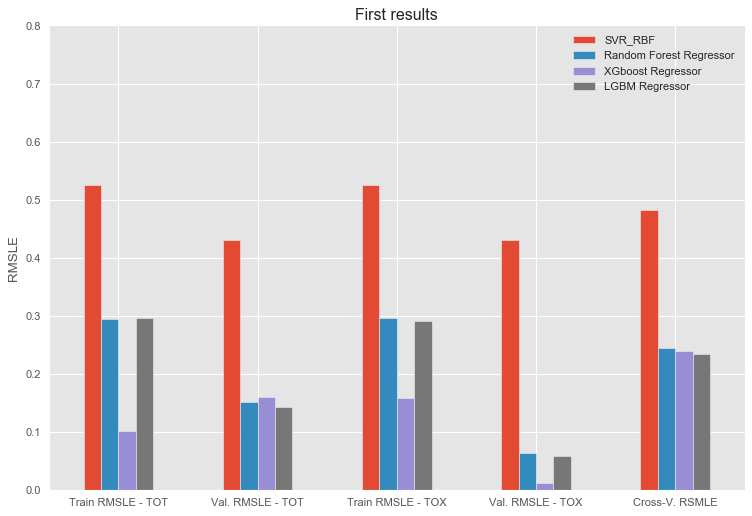

In [101]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,7))

first_results.drop("models", axis=1).T.plot(kind="bar", ax=ax)
ax.set(title="First results",
       ylabel="RMSLE",
       ylim = [0, 0.8]);

plt.xticks(rotation=0);


We are going to select:

* Random Forest Regressor
* XGBoost Regressor
* LGBM Regressor

As the models to tune through RandomizedSearchCV or GridSearchCV.

### 4. Hyperparameter tunning

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Random Forest Regressor

We create a grid of hyperparameters for our random forest regressor:

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

We randomly select 1000 combinations of hyperparameters and we perform cross-validation. The hyperparameters that show best results in terms of cross validation score are selected to train the model with all the training data.

In [86]:
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,
                                                              random_state=42),
                              param_distributions=rf_grid,
                              n_iter=1000,
                              cv=5,
                              verbose=True)

rs_model.fit(X, y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
CPU times: total: 13min 10s
Wall time: 29min 58s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=1000,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

Let's check the best hyperparameters that RandomizedSearchCV found for the Random Forest Regressor

In [87]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

Now we train a model with those hyperparameters

In [114]:
rfr = RandomForestRegressor(n_estimators=50,
                            min_samples_split= 4,
                            min_samples_leaf=1,
                            max_features=0.5,
                            max_depth=10,
                            random_state=42)

cv_rfr = rmsle_cv_score(rfr, X, y)
print(f"CV-RMSLE with Random Forest Regressor optimized: {cv_rfr:.4f}")                           

rfr.fit(X,y);

CV-RMSLE with Random Forest Regressor optimized: 0.2425


Let's check performance on training and validation sets

In [115]:
show_scores(rfr, X_train, X_val, y_train, y_val)

{'Training RMSLE': 0.3097206957758523, 'Validation RMSLE': 0.08183794964849848}

#### XGB Regressor

We create a grid of hyperparameters for our XGB Regressor:

In [127]:
xgbr_grid1 = {"max_depth": [3,4,5],
              "learning_rate": [0.01, 0.05, 0.1],
              "gamma": [0, 0.25, 1.0],
              "reg_lambda": [0, 1.0, 10.0]
             }

We randomly select 1000 combinations of hyperparameters and we perform cross-validation. The hyperparameters that show best results in terms of cross validation score are selected to train the model with all the training data.

In [130]:
xgbr_model = RandomizedSearchCV(estimator=XGBRegressor(seed=42),
                              param_distributions=xgbr_grid1,
                              n_iter=1000,
                              cv=5,
                              verbose=True)

xgbr_model.fit(X, y)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

Let's check the best hyperparameters that RandomizedSearchCV found for the XGB Regressor

In [131]:
xgbr_model.best_params_

{'reg_lambda': 1.0, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}

Now we train a model with those hyperparameters

In [133]:
xgbr = XGBRegressor(reg_lambda=1.0,
                   learning_rate=0.1,
                   gamma = 0,
                   max_depth=3,
                   seed=42)

cv_xgbr = rmsle_cv_score(xgbr, X, y)
print(f"CV-RMSLE with XGBoost Regressor optimized: {cv_xgbr:.4f}")                           

xgbr.fit(X,y);

CV-RMSLE with XGBoost Regressor optimized: 0.2286


Let's check performance on training and validation sets

In [134]:
show_scores(xgbr, X_train, X_val, y_train, y_val)

{'Training RMSLE': 0.293624546866522, 'Validation RMSLE': 0.09467132936046219}

Let us try a more intesive grid

In [84]:
xgbr_grid2 = {"colsample_bytree": np.linspace(0.1,0.9,5),
              "gamma": np.logspace(-4,2,10),
              "learning_rate": np.linspace(0.01,1,15),
              "max_depth": np.arange(1,11),
              "min_child_weight": np.logspace(-4,2,10),
              "n_estimators": [180],
              "reg_alpha": np.linspace(0.1,0.9,5),
              "reg_lambda": np.linspace(0.1,0.9,5),
              "subsample": np.linspace(0.1,0.9,5),
}   

In [85]:
xgbr_model2 = RandomizedSearchCV(estimator=XGBRegressor(seed=42),
                              param_distributions=xgbr_grid2,
                              n_iter=1000,
                              cv=5,
                              n_jobs=-1,
                              verbose=2)

xgbr_model2.fit(X, y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_weight': array([1.00000000e-04, 4.6415

In [86]:
xgbr_model2.best_params_

{'subsample': 0.7000000000000001,
 'reg_lambda': 0.9,
 'reg_alpha': 0.1,
 'n_estimators': 180,
 'min_child_weight': 0.01,
 'max_depth': 4,
 'learning_rate': 0.08071428571428571,
 'gamma': 0.21544346900318823,
 'colsample_bytree': 0.7000000000000001}

In [118]:
xgbr2 = XGBRegressor(colsample_bytree=0.7,
                     gamma=0.2154, 
                     learning_rate=0.0807, 
                     max_depth=4, 
                     min_child_weight=0.001, 
                     n_estimators=180,
                     reg_alpha=0.1,
                     reg_lambda=0.9,
                     subsample=0.7
                     )

cv_xgbr2 = rmsle_cv_score(xgbr2, X, y)
print(f"CV-RMSLE with XGBoost Regressor optimized: {cv_xgbr2:.4f}")                           

xgbr2.fit(X,y);

CV-RMSLE with XGBoost Regressor optimized: 0.2238


In [88]:
X_test = data_test.drop("SalePrice", axis = 1)
test_pred = xgbr2.predict(X_test)
submission = pd.DataFrame({})
submission["Id"] = data_test["Id"]
submission["SalePrice"] = test_pred
submission.head()
submission.to_csv("data/submission_xgb_hyp2.csv", index=False)

#### LGBM Regressor

In [51]:
lgbm_grid = {"objective": ["regression"],
             "num_leaves": [x**2 for x in np.arange(1,11)],
             "learning_rate": np.linspace(0.01,1,15),
             "n_estimators": [3000],
             "max_bin": np.linspace(5,255,15).astype(int),
             "bagging_fraction": np.linspace(0.1,1,5),
             "bagging_freq": np.linspace(1,11).astype(int),
             "feature_fraction": np.linspace(0.1,1,5),
             "feature_fraction_seed": [9],
             "bagging_seed": [9],
             "min_data_in_leaf": [x**2 for x in np.arange(1,11)],
             "min_sum_hessian_in_leaf": np.logspace(-4,0,10)
}   
import warnings
warnings.filterwarnings('ignore')

In [61]:
lgbmr_model = RandomizedSearchCV(estimator=LGBMRegressor(),
                              param_distributions=lgbm_grid,
                              n_iter=150,
                              cv=5,
                              verbose=True)

lgbmr_model.fit(X, y)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.002154434690031882, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.002154434690031882
[LightGBM] [Warning] bagging_fraction is set=0.325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.325
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=150,
                   param_distributions={'bagging_fraction': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                                        'bagging_freq': array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11]),
                                        'bagging_seed': [9],
                                        'feature_fraction': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                                        'feature_fractio...
       237, 255]),
                                        'min_data_in_leaf': [1, 4, 9, 16, 25,
                                                             36, 49, 64, 81,
                                                             100],
                                        'min_sum_hessian_in_leaf': array([1.00000000e-0

In [62]:
lgbmr_model.best_params_

{'objective': 'regression',
 'num_leaves': 16,
 'n_estimators': 3000,
 'min_sum_hessian_in_leaf': 0.016681005372000592,
 'min_data_in_leaf': 4,
 'max_bin': 112,
 'learning_rate': 0.08071428571428571,
 'feature_fraction_seed': 9,
 'feature_fraction': 0.55,
 'bagging_seed': 9,
 'bagging_freq': 9,
 'bagging_fraction': 0.775}

##### Hyper 4

In [72]:
X_f = X.drop("Id", axis=1)
X_f

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_None,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,3,0,7,5,2003,2003,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,1,3,0,6,8,1976,1976,...,0,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,1,3,0,7,5,2001,2002,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,1,3,0,7,5,1915,1970,...,0,0,1,1,0,0,0,0,0,0
4,60,84.0,14260,1,3,0,8,5,2000,2000,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,85.0,13175,1,3,0,6,6,1978,1988,...,0,0,1,0,0,0,0,0,1,0
1457,70,66.0,9042,1,3,0,7,9,1941,2006,...,0,0,1,0,0,0,0,0,1,0
1458,20,68.0,9717,1,3,0,5,6,1950,1996,...,0,0,1,0,0,0,0,0,1,0
1459,20,75.0,9937,1,3,0,5,6,1965,1965,...,0,0,1,0,0,0,0,0,1,0


In [158]:
lgbm2 = LGBMRegressor(objective='regression',
                      num_leaves=16,
                      learning_rate=0.080714,
                      n_estimators=3000,
                      max_bin=112,
                      bagging_fraction=0.775,
                      bagging_freq=9,
                      feature_fraction=0.55,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf=4, 
                      min_sum_hessian_in_leaf=0.016681)

cv_lgbm2 = rmsle_cv_score(lgbm2, X_f, y)
print(f"CV-RMSLE with LGBM Regressor optimized: {cv_lgbm2:.4f}")                           

lgbm2.fit(X_f,y);

[LightGBM] [Warning] feature_fraction is set=0.55, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.55
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.016681, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.016681
[LightGBM] [Warning] bagging_fraction is set=0.775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.775
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.55, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.55
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.016681, min_child_weight=0.001 will be ignored. Current value: min_sum_hess

##### Hyper 3

In [59]:
lgbm2 = LGBMRegressor(objective='regression',
                      num_leaves=9,
                      learning_rate=0.01,
                      n_estimators=3000,
                      max_bin=201,
                      bagging_fraction=0.55,
                      bagging_freq=1,
                      feature_fraction=0.775,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf=4, 
                      min_sum_hessian_in_leaf=0.00077426)

cv_lgbm2 = rmsle_cv_score(lgbm2, X, y)
print(f"CV-RMSLE with LGBM Regressor optimized: {cv_lgbm2:.4f}")                           

lgbm2.fit(X,y);

[LightGBM] [Warning] feature_fraction is set=0.775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00077426, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.00077426
[LightGBM] [Warning] bagging_fraction is set=0.55, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00077426, min_child_weight=0.001 will be ignored. Current value: min_

##### Hyper 2

In [55]:
lgbm2 = LGBMRegressor(objective='regression',
                      num_leaves=16,
                      learning_rate=0.01,
                      n_estimators=3000,
                      max_bin=201,
                      bagging_fraction=0.55,
                      bagging_freq=7,
                      feature_fraction=0.325,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf=4, 
                      min_sum_hessian_in_leaf=0.00215)

cv_lgbm2 = rmsle_cv_score(lgbm2, X, y)
print(f"CV-RMSLE with LGBM Regressor optimized: {cv_lgbm2:.4f}")                           

lgbm2.fit(X,y);

[LightGBM] [Warning] feature_fraction is set=0.325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.325
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.00215
[LightGBM] [Warning] bagging_fraction is set=0.55, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.325
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessi

##### Hyper 1

In [102]:
lgbm2 = LGBMRegressor(objective='regression',
                      num_leaves=4,
                      learning_rate=0.08071,
                      n_estimators=3000,
                      max_bin=219,
                      bagging_fraction=1,
                      bagging_freq=1,
                      feature_fraction=0.775,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf=1, 
                      min_sum_hessian_in_leaf=0.00215)

cv_lgbm2 = rmsle_cv_score(lgbm2, X, y)
print(f"CV-RMSLE with LGBM Regressor optimized: {cv_lgbm2:.4f}")                           

lgbm2.fit(X,y);

[LightGBM] [Warning] feature_fraction is set=0.775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.00215
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_

In [160]:
X_test = data_test.drop(["Id","SalePrice"], axis = 1)
test_pred = lgbm2.predict(X_test)
submission = pd.DataFrame({})
submission["Id"] = data_test["Id"]
submission["SalePrice"] = test_pred
submission.head()
submission.to_csv("data/submission_lgbm_hyp4_dpId.csv", index=False)

### 5. Model Stacking

We will use 3 regression models as base models:

* Random Forest
* XGBoost
* LGBM

And the meta model will be a Random Forest Regressor

In [211]:
from sklearn.model_selection import KFold
data_x, data_y, rf_pred, xgb_pred, lgbm_pred = list(), list(), list(), list(), list()
kfold = KFold(n_splits=5, shuffle=True)
X_arr = X_train.values
y_arr = np.array(y)
for train_ix, test_ix in kfold.split(X_arr):
	# get data
	train_X, test_X = X_arr[train_ix], X_arr[test_ix]
	train_y, test_y = y_arr[train_ix], y_arr[test_ix]
	data_x.extend(test_X)
	data_y.extend(test_y)
	# fit and make predictions with rf
	model1 = RandomForestRegressor(random_state=42, n_estimators= 50, min_samples_split= 4, 
                            min_samples_leaf= 1, max_features= 0.5,
                            max_depth= 10)
	model1.fit(train_X, train_y)
	pred1 = model1.predict(test_X)
	rf_pred.extend(pred1)

	# fit and make predictions with xgb
	model2 = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                     learning_rate=0.05, max_depth=3, 
                     min_child_weight=1.7817, n_estimators=2200,
                     reg_alpha=0.4640, reg_lambda=0.8571,
                     subsample=0.5213, silent=1,
                     random_state =0, nthread = -1,
                     verbosity = 0)
	model2.fit(train_X, train_y)
	pred2 = model2.predict(test_X)
	xgb_pred.extend(pred2)

	# fit and make predictions with lgbm
	model3 = LGBMRegressor(objective='regression',num_leaves=5,
                        learning_rate=0.05, n_estimators=720,
                        max_bin = 55, bagging_fraction = 0.8,
                        bagging_freq = 5, feature_fraction = 0.2319,
                        feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                        verbose_eval = -1)
	model3.fit(train_X, train_y)
	pred3 = model3.predict(test_X)
	lgbm_pred.extend(pred3)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_he

In [215]:
# create a meta dataset
def create_meta_dataset(data_x, rf_pred, xgb_pred, lgbm_pred):
	# convert to columns
	rf_pred = np.array(rf_pred).reshape((len(rf_pred), 1))
	xgb_pred = np.array(xgb_pred).reshape((len(xgb_pred), 1))
	lgbm_pred = np.array(lgbm_pred).reshape((len(lgbm_pred), 1))
	# stack as separate columns
	meta_X = np.hstack((data_x, rf_pred, xgb_pred, lgbm_pred))
	return meta_X

In [216]:
# construct meta dataset
meta_X = create_meta_dataset(data_x, rf_pred, xgb_pred, lgbm_pred)

In [217]:
model1 = RandomForestRegressor(random_state=42, n_estimators= 50, min_samples_split= 4, 
                            min_samples_leaf= 1, max_features= 0.5,
                            max_depth= 10)
model1.fit(X_arr, y_arr)
model2 = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                     learning_rate=0.05, max_depth=3, 
                     min_child_weight=1.7817, n_estimators=2200,
                     reg_alpha=0.4640, reg_lambda=0.8571,
                     subsample=0.5213, silent=1,
                     random_state =0, nthread = -1,
                     verbosity = 0)
model2.fit(X_arr, y_arr)
model3 = LGBMRegressor(objective='regression',num_leaves=5,
                        learning_rate=0.05, n_estimators=720,
                        max_bin = 55, bagging_fraction = 0.8,
                        bagging_freq = 5, feature_fraction = 0.2319,
                        feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                        verbose_eval = -1)
model3.fit(X_arr, y_arr)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression', verbose_eval=-1)

In [218]:
meta_model = RandomForestRegressor(random_state=42)
meta_model.fit(meta_X, data_y)

RandomForestRegressor(random_state=42)

In [208]:
def stack_prediction(model1, model2, model3, meta_model, X):
    # make predictions
    rf_pred = model1.predict(X)
    xgb_pred = model2.predict(X)
    lgbm_pred = model3.predict(X)
    # create input dataset
    meta_X = create_meta_dataset(X, rf_pred, xgb_pred, lgbm_pred)
    # predict
    return meta_model.predict(meta_X)

With Vanilla models

In [191]:
rmsle1 = show_scores(model1, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle2 = show_scores(model2, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle3 = show_scores(model3, X_arr, X_val.values, y_arr, np.array(y_val))
print("Model 1 RMSLE")
print(rmsle1)
print("Model 2 RMSLE")
print(rmsle2)
print("Model 3 RMSLE")
print(rmsle3)
# evaluate meta model on hold out dataset
yhat = stack_prediction(model1, model2, model3, meta_model, X_val.values)
rmsle_stack = rmsle(y_val, yhat)
print('Meta Model RMSLE')
print(rmsle_stack)

Model 1 RMSLE
{'Training RMSLE': 0.29551376121292444, 'Validation RMSLE': 0.14958093677149237}
Model 2 RMSLE
{'Training RMSLE': 0.10107584001628886, 'Validation RMSLE': 0.16117373595531392}
Model 3 RMSLE
{'Training RMSLE': 0.2966112651308051, 'Validation RMSLE': 0.1435149197959219}
Meta Model RMSLE
0.1425181405036321


Models with some params (no vanilla)

In [209]:
rmsle1 = show_scores(model1, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle2 = show_scores(model2, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle3 = show_scores(model3, X_arr, X_val.values, y_arr, np.array(y_val))
print("Model 1 RMSLE")
print(rmsle1)
print("Model 2 RMSLE")
print(rmsle2)
print("Model 3 RMSLE")
print(rmsle3)
# evaluate meta model on hold out dataset
yhat = stack_prediction(model1, model2, model3, meta_model, X_val.values)
rmsle_stack = rmsle(y_val, yhat)
print('Meta Model RMSLE')
print(rmsle_stack)

Model 1 RMSLE
{'Training RMSLE': 0.31269809764997, 'Validation RMSLE': 0.151052311493638}
Model 2 RMSLE
{'Training RMSLE': 0.1853167315157738, 'Validation RMSLE': 0.1368855539908514}
Model 3 RMSLE
{'Training RMSLE': 0.27410958787958517, 'Validation RMSLE': 0.14205252142445213}
Meta Model RMSLE
0.13556697736787918


In [210]:
X_test = data_test.drop("SalePrice", axis = 1)

In [219]:
y_pred = stack_prediction(model1, model2, model3, meta_model, X_test.values)

In [220]:
submission = pd.DataFrame({})
submission["Id"] = data_test["Id"]
submission["SalePrice"] = y_pred
submission.head()


,Id,SalePrice
0,1461,119787.50
1,1462,163662.33
2,1463,181728.95
3,1464,194303.11
4,1465,180204.86


In [221]:
submission.to_csv("data/submission_stacking2_no_v.csv", index=False)

Stacking submission was not the best. It has the 2nd place

#### Model Stacking v2

We will use 3 regression models as base models:

* Random Forest
* XGBoost
* LGBM

And the meta model will be a LGBM Regressor

In [147]:
from sklearn.model_selection import KFold
data_x, data_y, rf_pred, xgb_pred, lgbm_pred = list(), list(), list(), list(), list()
kfold = KFold(n_splits=5, shuffle=True)
X_arr = X_train.values
y_arr = np.array(y_train)
for train_ix, test_ix in kfold.split(X_arr):
	# get data
	train_X, test_X = X_arr[train_ix], X_arr[test_ix]
	train_y, test_y = y_arr[train_ix], y_arr[test_ix]
	data_x.extend(test_X)
	data_y.extend(test_y)
	# fit and make predictions with rf
	model1 = LGBMRegressor()
	model1.fit(train_X, train_y)
	pred1 = model1.predict(test_X)
	rf_pred.extend(pred1)

	# fit and make predictions with xgb
	model2 = XGBRegressor(colsample_bytree=0.7,
						gamma=0.2154,
						learning_rate=0.0807,
						max_depth=4,
						min_child_weight=0.001,
						n_estimators=180,
						reg_alpha=0.1,
						reg_lambda=0.9,
						subsample=0.7)
	model2.fit(train_X, train_y)
	pred2 = model2.predict(test_X)
	xgb_pred.extend(pred2)

	# fit and make predictions with lgbm
	model3 = LGBMRegressor(objective='regression',
							num_leaves=16, 
							learning_rate=0.01,
							n_estimators=3000,
							max_bin=201,
							bagging_fraction=0.55,
							bagging_freq=7,
							feature_fraction=0.325,
							feature_fraction_seed=9, 
							bagging_seed=9,
							min_data_in_leaf=4, 
							min_sum_hessian_in_leaf=0.00215,
							verbose_eval = -1)
	model3.fit(train_X, train_y)
	pred3 = model3.predict(test_X)
	lgbm_pred.extend(pred3)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.325
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.00215
[LightGBM] [Warning] bagging_fraction is set=0.55, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] feature_fraction is set=0.325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.325
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] mi

In [149]:
# create a meta dataset
def create_meta_dataset(data_x, rf_pred, xgb_pred, lgbm_pred):
	# convert to columns
	rf_pred = np.array(rf_pred).reshape((len(rf_pred), 1))
	xgb_pred = np.array(xgb_pred).reshape((len(xgb_pred), 1))
	lgbm_pred = np.array(lgbm_pred).reshape((len(lgbm_pred), 1))
	# stack as separate columns
	meta_X = np.hstack((data_x, rf_pred, xgb_pred, lgbm_pred))
	return meta_X

In [150]:
# construct meta dataset
meta_X = create_meta_dataset(data_x, rf_pred, xgb_pred, lgbm_pred)

In [151]:
model1 = LGBMRegressor()
model1.fit(X_arr, y_arr)

model2 = XGBRegressor(colsample_bytree=0.7,
						gamma=0.2154,
						learning_rate=0.0807,
						max_depth=4,
						min_child_weight=0.001,
						n_estimators=180,
						reg_alpha=0.1,
						reg_lambda=0.9,
						subsample=0.7)
model2.fit(X_arr, y_arr)
model3 = LGBMRegressor(objective='regression',
							num_leaves=16, 
							learning_rate=0.01,
							n_estimators=3000,
							max_bin=201,
							bagging_fraction=0.55,
							bagging_freq=7,
							feature_fraction=0.325,
							feature_fraction_seed=9, 
							bagging_seed=9,
							min_data_in_leaf=4, 
							min_sum_hessian_in_leaf=0.00215,
							verbose_eval = -1)
model3.fit(X_arr, y_arr)

LGBMRegressor(bagging_fraction=0.55, bagging_freq=7, bagging_seed=9,
              feature_fraction=0.325, feature_fraction_seed=9,
              learning_rate=0.01, max_bin=201, min_data_in_leaf=4,
              min_sum_hessian_in_leaf=0.00215, n_estimators=3000, num_leaves=16,
              objective='regression', verbose_eval=-1)

In [152]:
meta_model = LGBMRegressor(random_state=42)
meta_model.fit(meta_X, data_y)

LGBMRegressor(random_state=42)

In [142]:
def stack_prediction(model1, model2, model3, meta_model, X):
    # make predictions
    rf_pred = model1.predict(X)
    xgb_pred = model2.predict(X)
    lgbm_pred = model3.predict(X)
    # create input dataset
    meta_X = create_meta_dataset(X, rf_pred, xgb_pred, lgbm_pred)
    # predict
    return meta_model.predict(meta_X)

No vanilla with 2 LGBMs and XGBR as base models

In [153]:
rmsle1 = show_scores(model1, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle2 = show_scores(model2, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle3 = show_scores(model3, X_arr, X_val.values, y_arr, np.array(y_val))
print("Model 1 RMSLE")
print(rmsle1)
print("Model 2 RMSLE")
print(rmsle2)
print("Model 3 RMSLE")
print(rmsle3)
# evaluate meta model on hold out dataset
yhat = stack_prediction(model1, model2, model3, meta_model, X_val.values)
rmsle_stack = rmsle(y_val, yhat)
print('Meta Model RMSLE')
print(rmsle_stack)

Model 1 RMSLE
{'Training RMSLE': 0.2966112651308051, 'Validation RMSLE': 0.1435149197959219}
Model 2 RMSLE
{'Training RMSLE': 0.2523750131818661, 'Validation RMSLE': 0.14014772550565158}
Model 3 RMSLE
{'Training RMSLE': 0.1539316443247724, 'Validation RMSLE': 0.13684681545455532}
Meta Model RMSLE
0.14362227285715418


In [154]:
X_test = data_test.drop("SalePrice", axis = 1)
y_pred = stack_prediction(model1, model2, model3, meta_model, X_test.values)
submission = pd.DataFrame({})
submission["Id"] = data_test["Id"]
submission["SalePrice"] = y_pred
submission.head()

,Id,SalePrice
0,1461,128675.348290
1,1462,165154.711650
2,1463,185980.319606
3,1464,199694.447506
4,1465,189570.617541


In [155]:
submission.to_csv("data/submission_stacking4_no_v.csv", index=False)

No vanilla

In [143]:
rmsle1 = show_scores(model1, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle2 = show_scores(model2, X_arr, X_val.values, y_arr, np.array(y_val))
rmsle3 = show_scores(model3, X_arr, X_val.values, y_arr, np.array(y_val))
print("Model 1 RMSLE")
print(rmsle1)
print("Model 2 RMSLE")
print(rmsle2)
print("Model 3 RMSLE")
print(rmsle3)
# evaluate meta model on hold out dataset
yhat = stack_prediction(model1, model2, model3, meta_model, X_val.values)
rmsle_stack = rmsle(y_val, yhat)
print('Meta Model RMSLE')
print(rmsle_stack)

Model 1 RMSLE
{'Training RMSLE': 0.31269809764997, 'Validation RMSLE': 0.151052311493638}
Model 2 RMSLE
{'Training RMSLE': 0.2523750131818661, 'Validation RMSLE': 0.14014772550565158}
Model 3 RMSLE
{'Training RMSLE': 0.1539316443247724, 'Validation RMSLE': 0.13684681545455532}
Meta Model RMSLE
0.14597221685032843


In [144]:
X_test = data_test.drop("SalePrice", axis = 1)
y_pred = stack_prediction(model1, model2, model3, meta_model, X_test.values)
submission = pd.DataFrame({})
submission["Id"] = data_test["Id"]
submission["SalePrice"] = y_pred
submission.head()


,Id,SalePrice
0,1461,125986.434723
1,1462,158541.507974
2,1463,185429.052918
3,1464,203652.387919
4,1465,194383.407545


In [145]:
submission.to_csv("data/submission_stacking3_no_v.csv", index=False)

## 6. Model's results

For all the models that we trained and optimized let's visualize their performance on the test set for submission:

In [197]:
model_names = ["XGB 1", "XGB 2", "Lasso", 
               "LGBM 1", "LGBM 2", 
               "Stacking 1", "Stacking 2",
               "XGB 3", "LGBM 3", "LGBM 4",
               "LGBM 5", "Stacking 3"]

model_scores = [0.14205,
                0.13403,
                0.22931,
                0.13482,
                0.12385,
                0.12967,
                0.12655,
                0.12997,
                0.13879,
                0.12369,
                0.12806,
                0.13535]

test_rsmle = pd.DataFrame({"names": model_names, "test_score": model_scores})

test_rsmle["1m_score"] = 1-test_rsmle["test_score"]
test_rsmle.sort_values(by="1m_score", ascending=False, inplace=True)


<AxesSubplot:xlabel='names'>

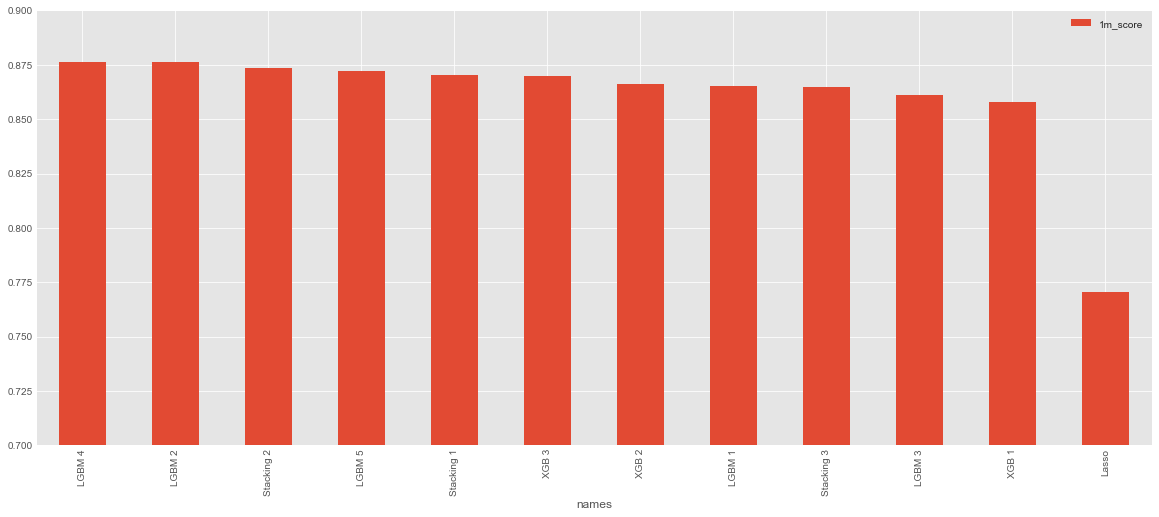

In [198]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,8))
test_rsmle.plot(kind="bar",
                x="names",
                y="1m_score",
                ax=ax,
                ylim=[0.7, 0.9])

The model with the best performance on the test set was the LGBM 4. Let's check the feature importances for that particular model:

In [193]:
X_f = X.drop("Id", axis=1)
best_model = LGBMRegressor(objective='regression',
                      num_leaves=16,
                      learning_rate=0.01,
                      n_estimators=3000,
                      max_bin=201,
                      bagging_fraction=0.55,
                      bagging_freq=7,
                      feature_fraction=0.325,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf=4, 
                      min_sum_hessian_in_leaf=0.00215)

best_model.fit(X_f,y);

[LightGBM] [Warning] feature_fraction is set=0.325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.325
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00215, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.00215
[LightGBM] [Warning] bagging_fraction is set=0.55, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


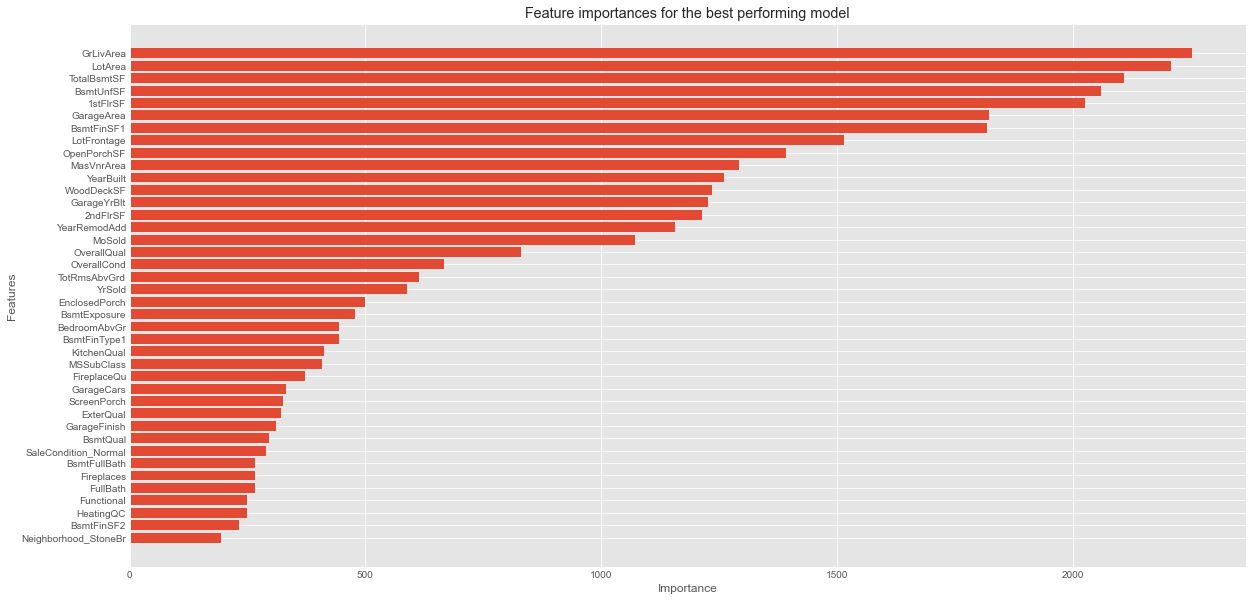

In [196]:
importances_df = pd.DataFrame({"Features":best_model.feature_name_, "Importance":best_model.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best performing model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

Notice how some of the most important features for the best models are also those features with a high correlation with the target `SalePrice`.

## 7. Future work

For further improvement in both performance on the test set and data comprehension, I suggest the following:
* Try another approach on missing values imputation and encoding
* Transform highly skewed columns through box-cox or logp1
* Intensive feature engineering
* Remove redundant features
* Implement other regression models
* Ask better questions